# Telecom Churn Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Goal of the case study

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

   - It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

   - It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

# Steps involved

        1. Import required library and datasets
        2. Understanding the data
            2.1 Data Cleaning
            2.2 Filter high-value customers
            2.3 Tag churners and remove attributes of the churn phase
            2.4 Missing value imputations
            2.5 Deriving Additonal Variables
        3. Exploratory Data Analysis (EDA)
            3.1 Univariate analysis
            3.2 Outlier treatment
            3.3 Bivariate analysis
            3.4 Plotting Response variable
            3.5 Correlation between variables
        4. Data preperation
            4.1 Data standardization
            4.2 Splitting into Train and Test 
        5. Modelling
            5.1 Principal Component Analysis (PCA)
            5.2 Decision Tree Classifier + PCA
                    A. Without hyperparameter tuning
                    B. With Hyperparameter tuning
            5.3 Random Forest Classifier + PCA
                    A. Without hyperparameters
                    B. With Hyperparameter tuning
            5.4 Logistic Regression + PCA
            5.5 Decision Tree Classifier
                    A. Without hyperparameters
                    B. With Hyperparameter tuning
            5.6 Random Forest Classifier
                    A. Without hyperparameters
                    B. With Hyperparameter tuning
            5.7 Logistic Regression
            5.8 XGBClassifier
                    A. Without hyperparameters
                    B. With Hyperparameter tuning
            5.9 Support Vector Machine
        6. Conclusion & Recommendations 

# 1. Import required library and Dataset

In [1]:
# Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate

sns.set_style('ticks')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data
df = pd.read_csv('telecom_churn_data.csv')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

# 2. Understanding the data

### 2.1 Data Cleaning

In [3]:
# Shape of the dataset
df.shape

(99999, 226)

In [4]:
# data type
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
# Checking for the null values
pd.DataFrame({'Total_Null_value': df.isnull().sum(),
              'Percentage_null_value': round((df.isnull().sum()/df.shape[0])*100, 2)})

Total_Null_value  Percentage_null_value
mobile_number                            0                   0.00
circle_id                                0                   0.00
loc_og_t2o_mou                        1018                   1.02
std_og_t2o_mou                        1018                   1.02
loc_ic_t2o_mou                        1018                   1.02
last_date_of_month_6                     0                   0.00
last_date_of_month_7                   601                   0.60
last_date_of_month_8                  1100                   1.10
last_date_of_month_9                  1659                   1.66
arpu_6                                   0                   0.00
arpu_7                                   0                   0.00
arpu_8                                   0                   0.00
arpu_9                                   0                   0.00
onnet_mou_6                           3937                   3.94
onnet_mou_7                           3859                   3.86
onnet_mou_8                           5378                   5.38
onnet_mou_9                           7745                   7.75
offnet_mou_6                          3937                   3.94
offnet_mou_7                          3859                   3.86
offnet_mou_8                          5378                   5.38
offnet_mou_9                          7745                   7.75
roam_ic_mou_6                         3937                   3.94
roam_ic_mou_7                         3859                   3.86
roam_ic_mou_8                         5378                   5.38
roam_ic_mou_9                         7745                   7.75
roam_og_mou_6                         3937                   3.94
roam_og_mou_7                         3859                   3.86
roam_og_mou_8                         5378                   5.38
roam_og_mou_9                         7745                   7.75
loc_og_t2t_mou_6                      3937                   3.94
loc_og_t2t_mou_7                      3859                   3.86
loc_og_t2t_mou_8                      5378                   5.38
loc_og_t2t_mou_9                      7745                   7.75
loc_og_t2m_mou_6                      3937                   3.94
loc_og_t2m_mou_7                      3859                   3.86
loc_og_t2m_mou_8                      5378                   5.38
loc_og_t2m_mou_9                      7745                   7.75
loc_og_t2f_mou_6                      3937                   3.94
loc_og_t2f_mou_7                      3859                   3.86
loc_og_t2f_mou_8                      5378                   5.38
loc_og_t2f_mou_9                      7745                   7.75
loc_og_t2c_mou_6                      3937                   3.94
loc_og_t2c_mou_7                      3859                   3.86
loc_og_t2c_mou_8                      5378                   5.38
loc_og_t2c_mou_9                      7745                   7.75
loc_og_mou_6                          3937                   3.94
loc_og_mou_7                          3859                   3.86
loc_og_mou_8                          5378                   5.38
loc_og_mou_9                          7745                   7.75
std_og_t2t_mou_6                      3937                   3.94
std_og_t2t_mou_7                      3859                   3.86
std_og_t2t_mou_8                      5378                   5.38
std_og_t2t_mou_9                      7745                   7.75
std_og_t2m_mou_6                      3937                   3.94
std_og_t2m_mou_7                      3859                   3.86
std_og_t2m_mou_8                      5378                   5.38
std_og_t2m_mou_9                      7745                   7.75
std_og_t2f_mou_6                      3937                   3.94
std_og_t2f_mou_7                      3859                   3.86
std_og_t2f_mou_8                      5378                   5.38


In [6]:
# dropping columns with null value more than 50%

for col in df.columns:
    if round((df[col].isnull().sum()/df.shape[0])*100)>= 50:
        df.drop(col, axis=1, inplace=True)

In [7]:
# Looking for the remaining null values
df.isnull().sum().sort_values(ascending=False)

loc_og_t2m_mou_9        7745
loc_ic_t2m_mou_9        7745
offnet_mou_9            7745
std_ic_t2f_mou_9        7745
roam_ic_mou_9           7745
std_og_t2t_mou_9        7745
roam_og_mou_9           7745
std_ic_t2m_mou_9        7745
loc_og_t2t_mou_9        7745
std_ic_t2o_mou_9        7745
loc_og_mou_9            7745
std_ic_t2t_mou_9        7745
isd_og_mou_9            7745
loc_ic_t2f_mou_9        7745
loc_og_t2c_mou_9        7745
loc_og_t2f_mou_9        7745
loc_ic_t2t_mou_9        7745
std_og_t2m_mou_9        7745
spl_ic_mou_9            7745
std_ic_mou_9            7745
ic_others_9             7745
std_og_mou_9            7745
isd_ic_mou_9            7745
spl_og_mou_9            7745
onnet_mou_9             7745
std_og_t2c_mou_9        7745
loc_ic_mou_9            7745
og_others_9             7745
std_og_t2f_mou_9        7745
std_og_t2t_mou_8        5378
std_og_t2c_mou_8        5378
loc_ic_t2m_mou_8        5378
loc_ic_t2f_mou_8        5378
og_others_8             5378
std_og_t2m_mou

In [8]:
# Descriptive statistics
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [9]:
# on the basis of statistical description we can drop the following variables
df.drop(['mobile_number','circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], axis = 1,inplace = True)

In [10]:
# Dropping 'last_date_of_month' variables
df.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'], axis = 1 , inplace = True)

In [11]:
# Final Shape
df.shape

(99999, 169)

### 2.2 Filter high-value customers

In [12]:
# Considering 6th and 7th month as Good phase period
df['Total_6_7_mon'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [13]:
# 70 percentile for the derived column
qua = df['Total_6_7_mon'].quantile(0.7)
qua

368.5

In [14]:
# Taking out the data where recharge amount is more than 70th percentile of average value of recharge
df_qua = df[df['Total_6_7_mon']>= qua]
df_qua.head(2)

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7  1069.180  1349.850  3171.480  500.000        57.84        54.68   
8   378.721   492.223   137.362  166.787       413.69       351.03   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7        52.29          NaN        453.43        567.16        325.91   
8        35.08        33.46         94.66         80.63        136.48   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7           NaN          16.23          33.49          31.64            NaN   
8        108.71           0.00           0.00           0.00            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7          23.74          12.59          38.06            NaN   
8           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7             51.39             31.38             40.28               NaN   
8            297.13            217.59             12.49             26.13   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7            308.63            447.38            162.28               NaN   
8             80.96             70.58             50.54             34.58   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7             62.13             55.14             53.23               NaN   
8              0.00              0.00              0.00               0.0   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7               0.0               0.0              0.00               NaN   
8               0.0               0.0              7.15               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7        422.16        533.91        255.79           NaN              4.30   
8        378.09        288.18         63.04         60.71            116.56   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
7             23.29             12.01               NaN             49.89   
8            133.43             22.58              7.33             13.69   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
7             31.76             49.14               NaN              6.66   
8             10.04             75.69             74.13              0.00   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_mou_6  \
7             20.08             16.68               NaN         60.86   
8              0.00              0.00               0.0        130.26   

   std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
7         75.14         77.84           NaN           0.0          0.18   
8        143.48         98.28         81.46           0.0          0.00   

   isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7         10.01           NaN           4.5           0.0          6.50   
8          0.00           0.0           0.0           0.0         10.23   

   spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  \
7           NaN          0.0          0.0          0.0          NaN   
8           0.0          0.0          0.0          0.0          0.0   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
7          487.53          609.24          350.16            0.00   
8          508.36          431.66          171.56          142.18   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  \
7             58.14             32.26             27.31               NaN   
8             23.84              9.84              0.31              4.03   

   loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  \
7            217.56            221.49            121.19               NaN   
8             57.58           

In [15]:
df_qua.shape  # it should be 29.9k rows

(30011, 170)

### 2.3 Tag churners and remove attributes of the churn phase

In [16]:
# On the basis of 4th month we will classify the customer will churn or not churn,
# Taking the sum of all the variables if it is 0, means it will churn

df_qua['activity'] = df_qua['total_ic_mou_9'] + df_qua['total_og_mou_9']+ df_qua['vol_2g_mb_9'] + df_qua['vol_3g_mb_9']

In [17]:
# Taking the descriptive statistics 
df_qua['activity'].describe()

count    30011.000000
mean      1174.016686
std       1232.486199
min          0.000000
25%        425.620000
50%        893.170000
75%       1563.510000
max      39227.890000
Name: activity, dtype: float64

In [18]:
# labelling the customer is churn or not 

df_qua['is_churn'] =  np.where(df_qua['activity'] == 0, 1, 0)

In [19]:
# checking for total churn customer
df_qua['is_churn'].sum()

2593

In [20]:
#  Looking for churn and non-churn values
df_qua['is_churn'].value_counts()

0    27418
1     2593
Name: is_churn, dtype: int64

In [21]:
#  Looking for percentage churn and non-churn values 
round(df_qua['is_churn'].value_counts(normalize=True)*100,2)

0    91.36
1     8.64
Name: is_churn, dtype: float64

In [22]:
# 'activity' column
df_qua.drop(columns = ['activity'], axis = 1, inplace = True)

In [23]:
# Dropping the variables with '_9' 
month_9 = []

for s in list(df.columns):
    if s.endswith('_9'):
        month_9.append(s)
        
print(month_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [24]:
# Dropping the variables which are for 9 month
df_qua.drop(month_9, axis = 1, inplace = True)
df_qua.shape

(30011, 130)

### 2.4 Missing value imputations

##### Taking numerical 

In [25]:
df_num = df_qua.select_dtypes(include = ['int64' , 'float64'])
df_num.head(2)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7  1069.180  1349.850  3171.480        57.84        54.68        52.29   
8   378.721   492.223   137.362       413.69       351.03        35.08   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7        453.43        567.16        325.91          16.23          33.49   
8         94.66         80.63        136.48           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7          31.64          23.74          12.59          38.06   
8           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7             51.39             31.38             40.28            308.63   
8            297.13            217.59             12.49             80.96   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7            447.38            162.28             62.13             55.14   
8             70.58             50.54              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7             53.23               0.0               0.0              0.00   
8              0.00               0.0               0.0              7.15   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7        422.16        533.91        255.79              4.30   
8        378.09        288.18         63.04            116.56   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7             23.29             12.01             49.89             31.76   
8            133.43             22.58             13.69             10.04   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7             49.14              6.66             20.08             16.68   
8             75.69              0.00              0.00              0.00   

   std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
7         60.86         75.14         77.84           0.0          0.18   
8        130.26        143.48         98.28           0.0          0.00   

   isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
7         10.01           4.5           0.0          6.50          0.0   
8          0.00           0.0           0.0         10.23          0.0   

   og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
7          0.0          0.0          487.53          609.24          350.16   
8          0.0          0.0          508.36          431.66          171.56   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
7             58.14             32.26             27.31            217.56   
8             23.84              9.84              0.31             57.58   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
7            221.49            121.19            152.16            101.46   
8             13.98             15.48              0.00              0.00   

   loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
7             39.53        427.88        355.23        188.04   
8              0.00         81.43         23.83         15.79   

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
7             36.89             11.83             30.39             91.44   
8              0.00              0.58              0.10             22.43   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
7            126.99            141.33             52.19             34.24   
8              4.08              0.65              0.00              0.00   

   std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
7             22.21        180.54        173.08        193.94          626.46   
8              0.00      

In [26]:
df_num.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'Total_6_7_mon'],
      dtype='object', length=126)

In [27]:
# imputing missing value based on median

for i in df_num.columns:
    m = df_qua[i].median()
    df_qua[i] = df_qua[i].fillna(m)

In [28]:
# looking for the variables wich are still missing
df_qua_null = df_qua.isnull().sum().sort_values(ascending=False)
df_qua_null[df_qua_null>0]

date_of_last_rech_8    594
date_of_last_rech_7    114
date_of_last_rech_6     62
dtype: int64

### 2.5 Deriving Additonal Variables

In [29]:
# Deriving change in ARPU between the 'action' and 'good' phases
df_qua['delta_arpu'] = df_qua['arpu_8'] - (df_qua['arpu_7'] + df_qua['arpu_6'])/2
df_qua['delta_arpu'].corr(df_qua['is_churn'])

-0.2868549361694963

In [30]:
# Deriving change in total usage between the 'action' and 'good' phases
df_qua['delta_mou'] = df_qua['total_ic_mou_8'] + df_qua['total_og_mou_8'] - (df_qua['total_ic_mou_7'] + df_qua['total_og_mou_7'] + df_qua['total_ic_mou_6'] + df_qua['total_og_mou_6'])/2
df_qua['delta_mou'].corr(df_qua['is_churn'])

-0.29814482893039945

In [31]:
# Deriving change in total recharge amount
df_qua['delta_total_rech_amt'] = df_qua['total_rech_amt_8'] - (df_qua['total_rech_amt_7'] + df_qua['total_rech_amt_6'])/2
df_qua['delta_total_rech_amt'].corr(df_qua['is_churn'])

-0.27599660655032066

In [32]:
# Creating variable with the last recharge, if the value is missing in the last month then it can be taken from previous month
df_qua['days_last_rech'] = df_qua['date_of_last_rech_8'].fillna(df_qua['date_of_last_rech_7'])
df_qua['days_last_rech'] = df_qua['days_last_rech'].fillna(df_qua['date_of_last_rech_6'])
df_qua['days_last_rech'] = pd.to_datetime('2014-9-01') - pd.to_datetime(df_qua['days_last_rech'])

In [33]:
# description of the variable
df_qua['days_last_rech'].describe()

count                        30011
mean     5 days 21:06:23.979207623
std      7 days 16:34:32.430561956
min                1 days 00:00:00
25%                2 days 00:00:00
50%                4 days 00:00:00
75%                7 days 00:00:00
max               86 days 00:00:00
Name: days_last_rech, dtype: object

In [34]:
# correlation with the predictive variable
df_qua['days_last_rech'].astype('int64').corr(df_qua['is_churn'])

0.2842263701949195

In [35]:
# Dropping the variables with the null values
df_qua.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis = 1, inplace = True)

In [36]:
# converting days_last_rech column into int format
df_qua['days_last_rech'] = df_qua['days_last_rech'].dt.days
df_qua['days_last_rech'].corr(df_qua['is_churn'])

0.28422637019491975

# 3. Exploratory Data Analysis (EDA)

In [37]:
# descriptive statistics of numeric variables
df_qua.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean     587.284404    589.135427    534.857433    297.385708    305.635027   
std      442.722413    462.897814    492.259586    460.093114    481.133789   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      364.161000    365.004500    289.609500     43.510000     43.260000   
50%      495.682000    493.561000    452.091000    128.330000    127.950000   
75%      703.922000    700.788000    671.150000    353.310000    359.925000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  30011.000000  30011.000000  30011.000000  30011.000000   30011.000000   
mean     270.922215    420.944380    426.806717    382.877999      17.412764   
std      465.019618    468.816296    484.848030    473.303750      79.152657   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       33.985000    142.825000    141.235000    111.730000       0.000000   
50%      106.280000    285.960000    285.485000    251.360000       0.000000   
75%      297.735000    523.125000    532.695000    482.610000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   30011.000000    30011.00000   30011.000000   30011.000000   
mean       13.522114       13.25627      29.321648      22.036003   
std        76.303736       74.55207     118.570414      97.925249   
min         0.000000        0.00000       0.000000       0.000000   
25%         0.000000        0.00000       0.000000       0.000000   
50%         0.000000        0.00000       0.000000       0.000000   
75%         0.000000        0.00000       0.000000       0.000000   
max      3813.290000     4169.81000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30011.000000      30011.000000      30011.000000      30011.000000   
mean       21.469272         95.031643         96.071691         88.103593   
std       106.244774        236.733374        248.023770        234.425312   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          8.990000          9.760000          7.760000   
50%         0.000000         33.330000         33.870000         30.830000   
75%         0.000000         91.460000         91.480000         84.670000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean         182.369489        182.343145        170.588886          6.983331   
std          249.564649        240.148330        233.311176         22.664321   
min            0.000000          0.000000          0.000000          0.000000   
25%           32.210000         35.560000         28.480000          0.000000   
50%          103.510000        106.140000         95.910000          0.380000   
75%          240.165000        239.485000        223.590000          5.090000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean           7.101811          6.504003          1.567160          1.862229   
std           22.587481         20.216988          6.889317          9.255645   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.450000          0.3100

## 3.1 Univariate analysis

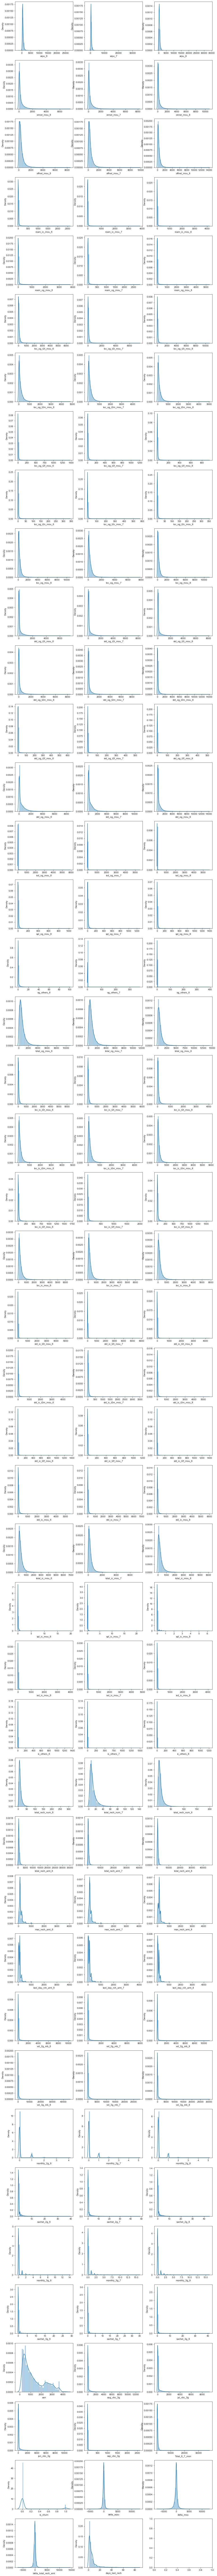

In [38]:
# Plotting distribution plots of numeric variables
fig,ax = plt.subplots(44,3,figsize=[15,200])
for i,x in enumerate(df_qua.columns):
    sns.distplot(df_qua[x],ax=ax[i//3,i%3])
fig.show()

**Inference**:
1. It is observed that most of the variables are right skewed due to presence of outliers.
2. The distribution plot indicates that most of the customer spending less amount towards the services.
3. The derived variables such as delta_arup, delta_mou and delta_total_rech_amt are normally distributed about 0.
4. From the day_last_rech it is boserved that most of the customers have recharged around '2014-9-01'.

## 3.2 Outlier treatment

In [39]:
# Capping the outliers present in the dataset
for x in df_qua.columns.drop('is_churn'):
    IQR = df_qua[x].quantile(0.75) - df_qua[x].quantile(0.25)
    UV = df_qua[x].quantile(0.75) + 1.5*IQR
    LV = df_qua[x].quantile(0.25) - 1.5*IQR
    df_qua[df_qua[x]>UV][x] = UV
    df_qua[df_qua[x]<LV][x] = LV

## 3.3 Bivariate analysis

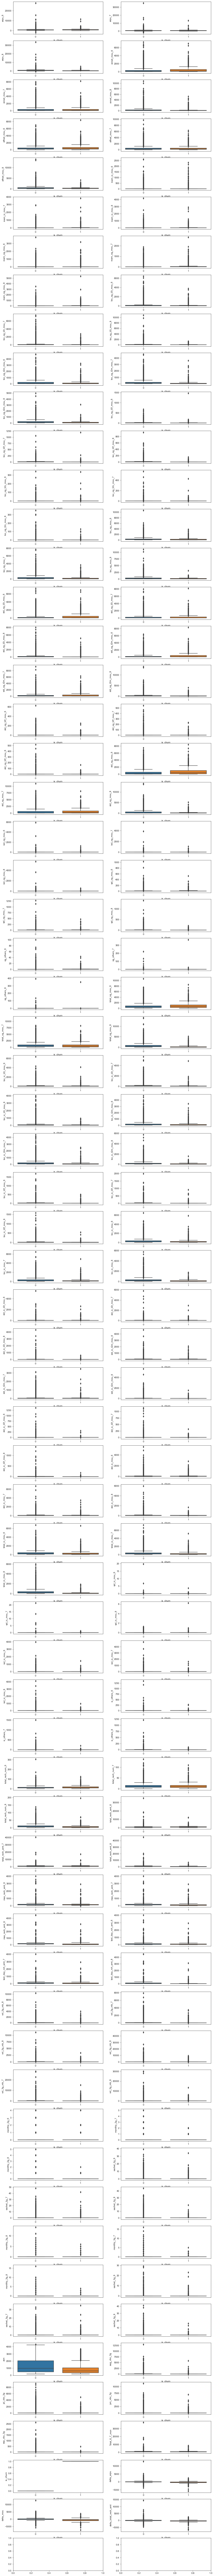

In [40]:
# Plotting box plots of numerical variables against categories
fig,ax = plt.subplots(66,2,figsize=[15,200])
for i,x in enumerate(df_qua.columns[:-1]):
    sns.boxplot(data=df_qua,x=df_qua['is_churn'],y=df_qua[x],ax=ax[i//2,i%2])
fig.show()

**Inference**
1. For the churners it is observed that the total recharge amount in the 8th month is minimum as compared with the 7th month.
2. The median value of age on network for non-churner is around 1000 days and for churn customer is around 750 days.
3. The derived variables 'delta_arpu', 'delta_mou' and 'delta_total_rech_amt' indicate that churned users exhibited a drop in revenue and minutes of usage during the action phase.
4. Lastly, the variable 'days_last_rech' shows that churned users did not recharge for a larger number of days.

## 3.4 Plotting Response Veriable

In [41]:
# Looking for the churn and non-churn values
print(df_qua.is_churn.value_counts())
print(df_qua.is_churn.value_counts(normalize=True).round(4)*100)

0    27418
1     2593
Name: is_churn, dtype: int64
0    91.36
1     8.64
Name: is_churn, dtype: float64


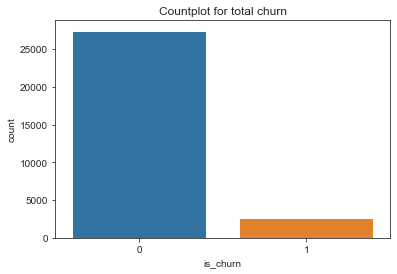

In [42]:
# plot countplot
sns.countplot(df_qua.is_churn)
plt.title("Countplot for total churn");

From the above it is observed that, in a given dataset the churn records are very less which is 8.64%. Indicates that the dataset is highly imbalanced. 
Need to apply some balancing techiniques 

## 3.5 Correlation between variables

In [43]:
# finding correlation between variables
df_qua.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                1.000000  0.631581  0.570936     0.289909     0.144335   
arpu_7                0.631581  1.000000  0.740811     0.141419     0.267967   
arpu_8                0.570936  0.740811  1.000000     0.089585     0.184020   
onnet_mou_6           0.289909  0.141419  0.089585     1.000000     0.720629   
onnet_mou_7           0.144335  0.267967  0.184020     0.720629     1.000000   
onnet_mou_8           0.119767  0.215522  0.309261     0.589082     0.793736   
offnet_mou_6          0.457085  0.277285  0.210040     0.003467    -0.035579   
offnet_mou_7          0.262580  0.437529  0.321538    -0.052486    -0.000708   
offnet_mou_8          0.217838  0.337554  0.481776    -0.040320    -0.000876   
roam_ic_mou_6         0.109162  0.071475  0.068859     0.005493     0.018320   
roam_ic_mou_7         0.069882  0.081132  0.064827     0.010883    -0.006797   
roam_ic_mou_8         0.077812  0.083953  0.101214     0.030235     0.022745   
roam_og_mou_6         0.176963  0.108474  0.106538     0.054115     0.057556   
roam_og_mou_7         0.122399  0.161861  0.122775     0.056178     0.047210   
roam_og_mou_8         0.107916  0.137825  0.186779     0.055619     0.065661   
loc_og_t2t_mou_6      0.128343  0.064029  0.064993     0.441665     0.320649   
loc_og_t2t_mou_7      0.087507  0.120313  0.099684     0.334463     0.447340   
loc_og_t2t_mou_8      0.086901  0.098491  0.148140     0.294176     0.360992   
loc_og_t2m_mou_6      0.274852  0.150510  0.155631    -0.040444    -0.077777   
loc_og_t2m_mou_7      0.178625  0.242394  0.210805    -0.075288    -0.060215   
loc_og_t2m_mou_8      0.160430  0.195119  0.301737    -0.071681    -0.064670   
loc_og_t2f_mou_6      0.112133  0.083800  0.096796    -0.060729    -0.068040   
loc_og_t2f_mou_7      0.082744  0.112816  0.109740    -0.069887    -0.065139   
loc_og_t2f_mou_8      0.071935  0.091712  0.135384    -0.070285    -0.066020   
loc_og_t2c_mou_6      0.045273  0.006127  0.000239     0.048129     0.030462   
loc_og_t2c_mou_7      0.009153  0.040592  0.019640     0.029092     0.057314   
loc_og_t2c_mou_8      0.004787  0.031311  0.055861     0.035824     0.059810   
loc_og_mou_6          0.267271  0.144312  0.148918     0.245250     0.144967   
loc_og_mou_7          0.177860  0.241037  0.207112     0.168705     0.253115   
loc_og_mou_8          0.163827  0.192449  0.293818     0.139978     0.186658   
std_og_t2t_mou_6      0.234149  0.110504  0.052901     0.850945     0.608296   
std_og_t2t_mou_7      0.100507  0.219905  0.140278     0.603300     0.853014   
std_og_t2t_mou_8      0.075219  0.177731  0.253611     0.486368     0.680214   
std_og_t2m_mou_6      0.262290  0.148684  0.070807     0.034901     0.010772   
std_og_t2m_mou_7      0.122051  0.269426  0.168130    -0.011040     0.037876   
std_og_t2m_mou_8      0.086631  0.201215  0.299007    -0.004248     0.038532   
std_og_t2f_mou_6      0.051461  0.034626  0.042124    -0.038358    -0.041959   
std_og_t2f_mou_7      0.037400  0.057390  0.055934    -0.040202    -0.035142   
std_og_t2f_mou_8      0.026049  0.036018  0.058497    -0.041411    -0.039352   
std_og_mou_6          0.337529  0.177216  0.085062     0.597992     0.417834   
std_og_mou_7          0.153129  0.333366  0.210366     0.396988     0.598306   
std_og_mou_8          0.110340  0.254363  0.370288     0.320973     0.478175   
isd_og_mou_6          0.481277  0.427520  0.398321    -0.019473    -0.018264   
isd_og_mou_7          0.432633  0.522933  0.442694    -0.020436    -0.018690   
isd_og_mou_8          0.425466  0.464600  0.463244    -0.018052    -0.016398   
spl_og_mou_6          0.113094  0.055194  0.085478     0.088130     0.051574   
spl_og_mou_7          0.050635  0.100618  0.107974     0.061778     0.107685   
spl_og_mou_8          0.023923  0.053448  0.088859     0.061946     0.099234   
og_others_6           0.086704  0.017109  0.008595     0.091167     0.039637   
og_others_7           0.

<AxesSubplot:>

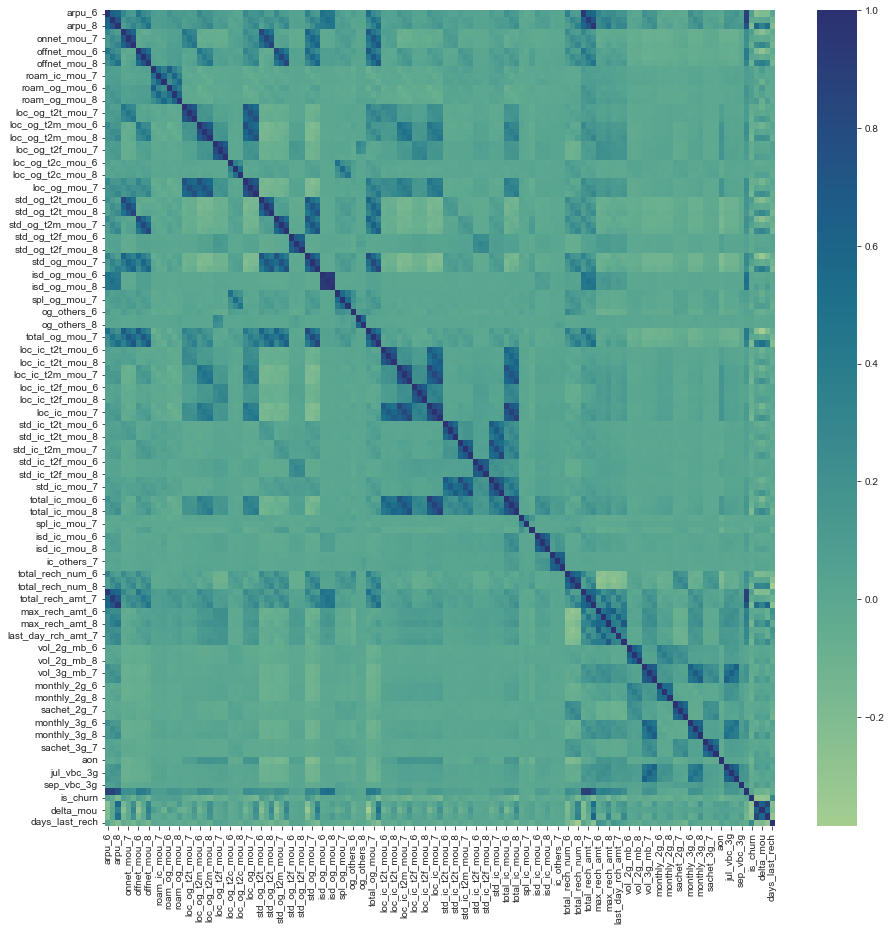

In [44]:
# plotting the heatmap
plt.figure(figsize =(15,15))
sns.heatmap(df_qua.corr(),cmap="crest")

In [45]:
# Printing top correlations excluding the trivial cases of self-correlation
df_qua.corr().unstack()[df_qua.corr().unstack()!=1].sort_values(ascending=False).head(10)

total_rech_amt_8  arpu_8              0.953725
arpu_8            total_rech_amt_8    0.953725
isd_og_mou_8      isd_og_mou_7        0.941347
isd_og_mou_7      isd_og_mou_8        0.941347
arpu_6            total_rech_amt_6    0.941256
total_rech_amt_6  arpu_6              0.941256
arpu_7            total_rech_amt_7    0.937114
total_rech_amt_7  arpu_7              0.937114
isd_og_mou_8      isd_og_mou_6        0.916058
isd_og_mou_6      isd_og_mou_8        0.916058
dtype: float64

Indicates that total recharge amount is the main driving factor towards tha revinue generation as it is highly correlated with the Average revenue per user

# 4. Data preperation

### 4.1 Data standardization

In [46]:
# taking out the columns, and dropping is_churn
df_col = df_qua.columns
df_col = df_col.drop('is_churn')
len(df_col)

130

In [47]:
# Instantiating the standardscaler metrix
scaler = StandardScaler()

# fit_transform all the variables in dataset
df_qua[df_col] = scaler.fit_transform(df_qua[df_col])

In [48]:
df_qua.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1.088501  1.643402  5.356252    -0.520655    -0.521600    -0.470165   
8  -0.471101 -0.209364 -0.807505     0.252788     0.094352    -0.507175   
13 -0.213316 -0.828414  0.118644     0.444209    -0.409966     0.566260   
16 -0.353070 -0.624914 -0.704850    -0.536587    -0.481423    -0.430768   
17  0.232031 -1.231730 -1.034753     1.931216    -0.615962    -0.565861   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7       0.069294      0.289484     -0.120364      -0.014943       0.261694   
8      -0.695987     -0.714002     -0.520600      -0.219993      -0.177217   
13     -0.016285     -0.634285      0.210401       0.077285       1.713154   
16     -0.265896     -0.406457     -0.465075      -0.219993      -0.140128   
17     -0.766420     -0.880304     -0.797256      -0.219993      -0.114834   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7        0.246593      -0.047075      -0.096463       0.156158   
8       -0.177815      -0.247297      -0.225033      -0.202077   
13       0.789444      -0.179994       0.135044      -0.188523   
16      -0.177815      -0.247297      -0.043871      -0.202077   
17      -0.113295      -0.247297      -0.138639      -0.076516   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7          -0.184352         -0.260833         -0.204007          0.505931   
8           0.853710          0.489954         -0.322554         -0.406352   
13         -0.191787         -0.362397         -0.222222         -0.125178   
16         -0.221441         -0.124634         -0.088403          0.364323   
17         -0.236733         -0.387355         -0.375834         -0.496190   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7           1.103657         -0.035613          2.433234          2.126797   
8          -0.465400         -0.514553         -0.308125         -0.314419   
13         -0.562425          0.530935         -0.107807         -0.314419   
16         -0.151380         -0.181344         -0.308125         -0.116076   
17         -0.759306         -0.731177         -0.308125         -0.314419   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7           2.311263         -0.227481         -0.201203         -0.231531   
8          -0.321715         -0.227481         -0.201203          0.735019   
13          0.841188         -0.227481         -0.201203         -0.165292   
16          0.185787         -0.227481         -0.201203         -0.231531   
17         -0.321715         -0.227481         -0.201203         -0.231531   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7       0.362562      0.661636     -0.028462         -0.453066   
8       0.246296      0.006191     -0.557933         -0.179025   
13     -0.209537     -0.619832      0.241287          0.626183   
16      0.082251     -0.187297     -0.165424         -0.444303   
17     -0.493859     -0.762481     -0.731100          2.336197   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7          -0.412880         -0.391362         -0.371699         -0.415863   
8          -0.155572         -0.365577         -0.459287         -0.465479   
13         -0.266424          0.794751          0.125448         -0.367480   
16         -0.461262         -0.412780         -0.436785         -0.341050   
17         -0.465397         -0.420660         -0.488661         -0.488414   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7          -0.315270          0.373216          1.351720          1.272653   
8          -0.251510         -0.161414         -0.152375         -0.152966   
13         -0.056388         -0.161414         -0.152375         -0.152966   
16         -0.389356         -0.161414         -0.152375         -0.152966   
17         -0.433280      

### 4.2 Splitting into Train and Test 

In [49]:
# Putting feature variable to X
X = df_qua.drop('is_churn' ,axis=1)

# Putting response variable to y
y = df_qua['is_churn']

In [50]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100, stratify= y)

In [51]:
# Shape of each matrix
X_train.shape,  X_test.shape , y_train.shape , y_test.shape

((21007, 130), (9004, 130), (21007,), (9004,))

# 5. Modelling

## 5.1 Principal Component Analysis (PCA)

The dataset consist of 130 independent variables, the dimensionality reduction techinique is applied to reduce the independednt variables along with the computation speed. 

In [52]:
# Instantiating the PCA 
pca = PCA(random_state=100)

# Fitting on train dataset
pca.fit(X_train)

PCA(random_state=100)

In [53]:
# Taking look at principal components
pca.components_

array([[ 1.34700253e-01,  1.49724746e-01,  1.65000532e-01, ...,
         2.79685226e-02,  4.30144671e-02, -2.73368478e-02],
       [ 8.66851755e-02,  1.11699906e-01,  1.04167952e-01, ...,
         1.25109266e-02,  1.71247526e-02, -5.81808097e-02],
       [ 1.16116573e-01,  1.45243121e-01,  1.55080545e-01, ...,
         5.44644872e-02,  3.82325675e-02,  9.16757801e-03],
       ...,
       [ 0.00000000e+00, -5.36348790e-17, -3.45242920e-16, ...,
         5.07077063e-02,  7.37484941e-02, -3.84253997e-17],
       [ 0.00000000e+00, -9.91968359e-17,  1.88982893e-16, ...,
         1.25290518e-01,  5.12373217e-01, -1.35599277e-17],
       [ 0.00000000e+00,  2.80002896e-16, -4.07526252e-16, ...,
         5.35264908e-01, -1.26918693e-01, -6.88362862e-17]])

In [54]:
# Explained variance ration for each components
# pca.explained_variance_ratio_

# making a scree plot for explained variance
var_cum = np.cumsum(pca.explained_variance_ratio_)

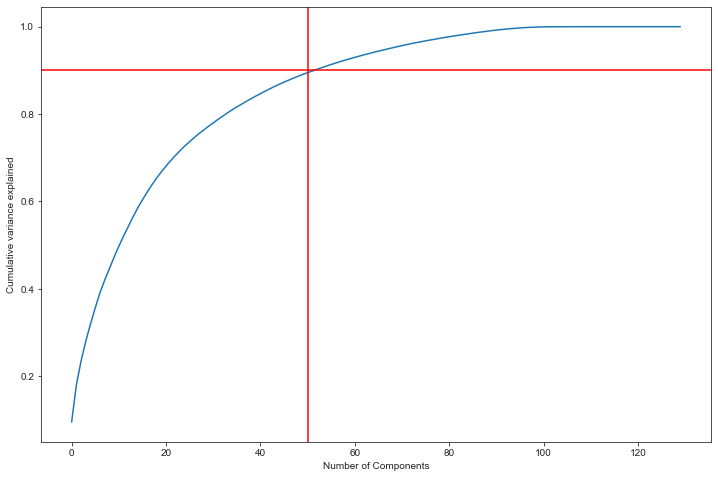

In [55]:
# Plotting the scree plot
fig = plt.figure(figsize = [12,8])
plt.plot(var_cum)
plt.xlabel('Number of Components')
plt.ylabel('Fraction of Variance Explained')
plt.axhline(y = 0.9, color = 'r', linestyle = '-') # plotting for better understanding
plt.axvline(x = 50, color = 'r', linestyle = '-') # plotting for better understanding
plt.ylabel("Cumulative variance explained");

Out of 130 dependent variables the PCA shows that the 50 variables are showing 90% variance in the datasets. Thses 50 variables are selected for the further analysis.

#### Rebuilding the model with 50 variables

In [56]:
# Instantiating the PCA 
pca2 = PCA(n_components= 50, random_state=100)

# Fitting on train dataset
x_train_pca = pca2.fit_transform(X_train)

In [57]:
x_train_pca.shape

(21007, 50)

In [58]:
# transforming test dataset
x_test_pca = pca2.transform(X_test)

In [59]:
df_train_pca = pd.DataFrame(x_train_pca, index=X_train.index, columns=['PC'+str(x) for x in range(1,51)])
df_test_pca = pd.DataFrame(x_test_pca, index=X_test.index, columns=['PC'+str(x) for x in range(1,51)])

In [60]:
# Labelling X_train_pca with the class and plotting a scatter plot
data_train_pca = pd.concat([df_train_pca,y_train],axis=1)
data_train_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
76985 -2.013650  1.803557  1.354757  0.727073 -0.409376 -1.217193  1.558016   
77814 -0.260380  4.840277 -1.166210 -1.090142  0.279051 -3.122581  2.514048   
24787  0.595436 -2.736724 -0.098907 -0.551847  0.224259  0.335529  0.967719   
60192 -3.389788 -1.511597  6.057444 -1.384670 -4.629945 -7.437598 -9.034888   
69896  0.901116 -0.678376 -1.162141  7.569732 -0.269985 -0.561577  1.608677   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
76985  0.461307  0.155347 -0.724106 -0.731121 -2.392123 -0.575094  0.157730   
77814  0.535724  0.428844  0.954099 -0.485801  0.387184  0.105124 -0.337680   
24787 -0.296471 -0.678480  0.656854 -0.105782  0.358557  0.414027 -0.152193   
60192  1.649321  4.198840 -5.500148 -0.027688  0.173021  3.448773  2.365434   
69896 -0.200238 -2.690894 -2.469731  0.286244  1.833488 -0.700693  3.273924   

           PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
76985  3.009725 -1.271073 -0.292241 -0.091440  0.297993 -0.193354  0.689587   
77814 -0.510506 -0.145578  0.122905  0.496840 -0.095752 -0.552441  0.206680   
24787  0.751222 -0.278035  0.131054  0.022191 -1.056354 -0.102429  0.461714   
60192 -9.590681  2.351908 -0.833674 -6.446317 -7.563531  0.516351 -0.044981   
69896 -0.649555 -2.387458  0.558741  1.463720  0.202152  7.040804  0.681772   

            PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
76985   1.034467 -0.238082 -2.624244 -2.409173 -1.570604  1.159672  0.354754   
77814  -0.238920 -0.286991 -0.469989  0.358544  0.154634 -0.429961  0.035264   
24787   0.177591  0.751126  0.346284 -0.324277 -1.006853 -0.271910 -0.194779   
60192  14.589355 -0.628099 -2.155964 -0.686904  3.002614  2.572014 -0.629538   
69896   0.471707  0.208222  0.959830  0.213740  0.538566  0.372801  0.578809   

           PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
76985  0.950606  0.691423  0.874435  1.093020  1.011708 -0.657447 -1.268388   
77814 -0.106629 -0.118869 -0.067016 -0.063930 -0.029166 -0.259045 -0.515576   
24787  0.156131  0.821071  0.224164  1.036681 -0.189320 -0.404000 -0.122545   
60192 -0.465841 -1.198207 -1.557357  1.752955 -0.828196 -0.203591  0.322816   
69896  0.211503  0.163392 -0.700897  0.104077 -0.167550 -0.440603 -0.269603   

           PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
76985 -0.162038 -0.289803 -1.452133 -0.165819  1.389513 -0.886777  0.344592   
77814  0.485931  0.295673 -0.049026  0.152502  0.241940  0.136353  0.024588   
24787  0.913427  0.084370  0.547404  0.236990 -1.020799 -0.385058 -0.454543   
60192  1.579995  0.064466  1.866537  0.019017 -2.247884 -0.197611 -0.016741   
69896 -0.151772  0.078584 -0.299759  1.948927 -0.154199 -0.134042  0.195232   

           PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
76985 -0.471398 -3.234142  1.016840  1.447655 -0.358685 -1.145553 -0.753303   
77814  0.580746  0.068449 -0.042846  0.143593  0.118714 -0.131099 -0.336940   
24787  0.106918 -0.065585 -0.377290  0.731614  0.247048  0.100320 -0.137675   
60192  0.802345 -0.629811 -1.057735  0.346569  0.218482  1.653355 -0.669449   
69896  0.555199 -0.304325  0.685478  0.390771 -0.059130 -0.423287 -0.250701   

           PC50  is_churn  
76985 -0.556846         0  
77814  0.217254         0  
24787 -0.030265         0  
60192 -0.073360         0  
69896 -0.262691         0

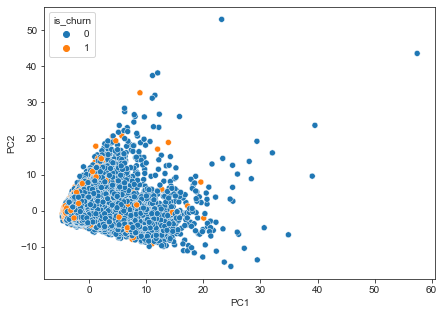

In [61]:
# Plotting scatter plot against two principal component vectors 
fig,ax = plt.subplots(figsize=[7,5])
sns.scatterplot(data_train_pca['PC1'],data_train_pca['PC2'],hue=data_train_pca['is_churn']);

The scatter plot of PC2 against PC1 does not show any significant separation of users who churned and did not churn probably because they together explain only a small proportion of the variance.

- By the application of the Principal component analysis, we are able to reduce the number of dimensions from **130** to **50** for the fiven case study. 
- These **50 variables shows the 90% of variance** and it can be further used as an input to different machine learning algorithms in order to increase the computation speed. 

## 5.2 Decision Tree Classifier + PCA

###### Creating an evaluation matrix

In [62]:
# creating function for understanding the evaluation matrix
def evaluation_matrix(x, y):
    print('The Confusion matrx is:\n',metrics.confusion_matrix(x,y))
    Acc =  round(metrics.accuracy_score(x,y),2)
    print('The Accuracy Score is :',Acc)
    tn, fp, fn, tp = metrics.confusion_matrix(x, y).ravel()
    # Sensitivity
    Sen = (tp / float(tp+fn)).round(4)
    print("Recall:",Sen)
    # Specificity
    Spe = (tn / float(tn+fp)).round(4)
    print("Specificity:", Spe)
    # Precision
    Pre = (tp/ float(tp+fp)).round(4)
    print("Precision:", Pre)
    #AUC score
    auc = metrics.roc_auc_score(x, y).round(4)
    print('AUC score :', auc)
    

### A. Without hyperparameter tuning

In [63]:
# Creating the decision tree with 10 steps
dt = DecisionTreeClassifier(max_depth=10,random_state=100, class_weight='balanced')

In [64]:
# fitting
dt.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=100)

In [65]:
# Plotting decision tree

# plt.figure(figsize=(60,30))
# plot_tree(dt, feature_names = pd.DataFrame(df_train_pca).columns, class_names= ['churn', 'not_churn'], filled=True);

In [66]:
# Printing relevant properties
print("Number of leaves:",dt.get_n_leaves())

Number of leaves: 328


In [67]:
# Prediction
y_train_pred_dt_wo = dt.predict(df_train_pca)
y_test_pred_dt_wo = dt.predict(df_test_pca)

In [68]:
# Evaluation matrix for Train
evaluation_matrix(y_train, np.round(abs(y_train_pred_dt_wo)))

The Confusion matrx is:
 [[17205  1987]
 [  113  1702]]
The Accuracy Score is : 0.9
Recall: 0.9377
Specificity: 0.8965
Precision: 0.4614
AUC score : 0.9171


In [69]:
# Evaluation matrix for Test
evaluation_matrix(y_test, np.round(abs(y_test_pred_dt_wo)))

The Confusion matrx is:
 [[7141 1085]
 [ 278  500]]
The Accuracy Score is : 0.85
Recall: 0.6427
Specificity: 0.8681
Precision: 0.3155
AUC score : 0.7554


In [70]:
# Creating a DataFrame with training and test performance metrics
final_Score = pd.DataFrame({'Method':['PCA + DecisionTreeClassifier_without_hyperpara'],
                            'train_accuracy': [accuracy_score(y_train, np.round(abs(y_train_pred_dt_wo))).round(4)],
                            'train_recall': [recall_score(y_train, np.round(abs(y_train_pred_dt_wo))).round(4)],
                            'train_precision': [precision_score(y_train, np.round(abs(y_train_pred_dt_wo))).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, np.round(abs(y_test_pred_dt_wo))).round(4)],
                            'test_recall': [recall_score(y_test, np.round(abs(y_test_pred_dt_wo))).round(4)],
                            'test_precision': [precision_score(y_test, np.round(abs(y_test_pred_dt_wo))).round(4)]
                          })
final_Score

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara             0.9   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155

- By applying the Decision Tree Classifier on top of the variables selected based on the PCA with initial depth of the tree as 10. 
- It has the Recall of 0.9377 and 0.6452 for the training and test dataset with an accuracy of 0.9 and 0.85 respectively.

### B. With Hyperparameter tuning

In [71]:
# Instantaiting the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=100, class_weight='balanced')

In [72]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20, 30, 40 ],
    'min_samples_leaf': [20, 50, 100, 200,250,300],
    'criterion': ['gini']
}

In [73]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "recall")

In [74]:
%%time
# Fitting on the train and test dataset 
# previous computation time 1 min
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 1.19 s
Wall time: 31.4 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 10, 20, 30, 40],
                         'min_samples_leaf': [20, 50, 100, 200, 250, 300]},
             scoring='recall', verbose=1)

In [75]:
# liiking at gridserachCV results
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.549105  4.160132e-02         0.005019        0.000547   
1       0.713706  8.062443e-02         0.004330        0.002019   
2       0.488980  8.617882e-03         0.003927        0.006052   
3       0.468718  9.221592e-07         0.000000        0.000000   
4       0.477338  1.539283e-02         0.006249        0.007654   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                     20   
1            gini               5                     50   
2            gini               5                    100   
3            gini               5                    200   
4            gini               5                    250   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.768595   
1  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.768595   
2  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.771350   
3  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.774105   
4  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.785124   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.782369           0.741047           0.746556           0.776860   
1           0.779614           0.749311           0.743802           0.796143   
2           0.785124           0.760331           0.757576           0.793388   
3           0.804408           0.776860           0.765840           0.779614   
4           0.807163           0.785124           0.749311           0.776860   

   mean_test_score  std_test_score  rank_test_score  
0         0.763085        0.016437               26  
1         0.767493        0.019292               25  
2         0.773554        0.013873               18  
3         0.780165        0.012968               14  
4         0.780716        0.018652                9

In [76]:
# Top 5 values based on the test score
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
9        0.660238      0.040537         0.006250        0.007654   
15       0.737493      0.034568         0.006250        0.007654   
21       0.668705      0.022962         0.009375        0.007654   
27       0.659330      0.011692         0.006250        0.007654   
10       0.621833      0.022963         0.000000        0.000000   

   param_criterion param_max_depth param_min_samples_leaf  \
9             gini              10                    200   
15            gini              20                    200   
21            gini              30                    200   
27            gini              40                    200   
10            gini              10                    250   

                                               params  split0_test_score  \
9   {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.787879   
15  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.787879   
21  {'criterion': 'gini', 'max_depth': 30, 'min_sa...           0.787879   
27  {'criterion': 'gini', 'max_depth': 40, 'min_sa...           0.787879   
10  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.798898   

    split1_test_score  split2_test_score  split3_test_score  \
9            0.831956           0.807163           0.782369   
15           0.831956           0.807163           0.782369   
21           0.831956           0.807163           0.782369   
27           0.831956           0.807163           0.782369   
10           0.818182           0.829201           0.765840   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
9            0.785124         0.798898        0.018684                1  
15           0.785124         0.798898        0.018684                1  
21           0.785124         0.798898        0.018684                1  
27           0.785124         0.798898        0.018684                1  
10           0.782369         0.798898        0.023048                5

In [77]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=200, random_state=100)

In [78]:
# mean_test_score 
grid_search.best_score_

0.7988980716253444

In [79]:
# Prediction
y_train_pred_dt = dt_best.predict(df_train_pca)
y_test_pred_dt = dt_best.predict(df_test_pca)

In [80]:
# Plotting decision tree

# plt.figure(figsize=(60,30))
# plot_tree(dt_best, feature_names = pd.DataFrame(df_train_pca).columns, class_names= ['churn', 'not_churn'], filled=True);

In [81]:
# Evaluation matrix for Train
evaluation_matrix(y_train, np.round(abs(y_train_pred_dt)))

The Confusion matrx is:
 [[15753  3439]
 [  317  1498]]
The Accuracy Score is : 0.82
Recall: 0.8253
Specificity: 0.8208
Precision: 0.3034
AUC score : 0.8231


In [82]:
# Evaluation matrix for Test
evaluation_matrix(y_test, np.round(abs(y_test_pred_dt)))

The Confusion matrx is:
 [[6692 1534]
 [ 196  582]]
The Accuracy Score is : 0.81
Recall: 0.7481
Specificity: 0.8135
Precision: 0.275
AUC score : 0.7808


In [83]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['PCA + DecisionTreeClassifier_with_hyperpara'],
                            'train_accuracy': [accuracy_score(y_train, np.round(abs(y_train_pred_dt))).round(4)],
                            'train_recall': [recall_score(y_train, np.round(abs(y_train_pred_dt))).round(4)],
                            'train_precision': [precision_score(y_train, np.round(abs(y_train_pred_dt))).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, np.round(abs(y_test_pred_dt))).round(4)],
                            'test_recall': [recall_score(y_test, np.round(abs(y_test_pred_dt))).round(4)],
                            'test_precision': [precision_score(y_test, np.round(abs(y_test_pred_dt))).round(4)]
                          })
temp
Final_score_1 = pd.concat([final_Score, temp])
Final_score_1

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750

- The Decision Tree Classifier algorithm is used with the different hyperparameter values. 
- Out of these the best estimator has the max tree depth of 20 and min_samples_leaf of 250.
- Which has the recall value of 0.82 and 0.74 for train and the test datasets. Both the train and test matrix shows the accuracy around 82%.

## 5.3 Random Forest Classifier + PCA

### A. Without hyperparameters

In [84]:
# instantiating the RandomForestClassifier initial depth as 10
RF = RandomForestClassifier(random_state = 100, max_depth = 10, class_weight='balanced', oob_score= True)

# fitting it on train dataset
RF.fit(df_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, oob_score=True,
                       random_state=100)

In [85]:
# taking 1st parameter for tree
est = RF.estimators_[0]
est

DecisionTreeClassifier(max_depth=10, max_features='auto',
                       random_state=186422792)

In [86]:
# Plotting decision tree

# plt.figure(figsize=(60,30))
# plot_tree(est, feature_names = pd.DataFrame(df_train_pca).columns, class_names= ['churn', 'not_churn'], filled=True);

In [87]:
# Prediction
y_train_pred_rf_wo = est.predict(df_train_pca)
y_test_pred_rf_wo = est.predict(df_test_pca)

In [88]:
# Evaluation matrix for Train
evaluation_matrix(y_train, np.round(abs(y_train_pred_rf_wo)))

The Confusion matrx is:
 [[16227  2965]
 [  374  1441]]
The Accuracy Score is : 0.84
Recall: 0.7939
Specificity: 0.8455
Precision: 0.3271
AUC score : 0.8197


In [89]:
# Evaluation matrix for Train
evaluation_matrix(y_test, np.round(abs(y_test_pred_rf_wo)))

The Confusion matrx is:
 [[6820 1406]
 [ 351  427]]
The Accuracy Score is : 0.8
Recall: 0.5488
Specificity: 0.8291
Precision: 0.233
AUC score : 0.689


In [90]:
# looking for the oob score
print(RF.oob_score_)

0.9026991002999001


In [91]:
# Creating a DataFrame with training and test performance metrics
temp1 = pd.DataFrame({'Method':['PCA + RandomForestClassifier_without_hyperpara'],
                            'train_accuracy': [accuracy_score(y_train, np.round(abs(y_train_pred_rf_wo))).round(4)],
                            'train_recall': [recall_score(y_train, np.round(abs(y_train_pred_rf_wo))).round(4)],
                            'train_precision': [precision_score(y_train, np.round(abs(y_train_pred_rf_wo))).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, np.round(abs(y_test_pred_rf_wo))).round(4)],
                            'test_recall': [recall_score(y_test, np.round(abs(y_test_pred_rf_wo))).round(4)],
                            'test_precision': [precision_score(y_test, np.round(abs(y_test_pred_rf_wo))).round(4)]
                          })
temp1
Final_score_2 = pd.concat([Final_score_1, temp1])
Final_score_2

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330

- The initial Random forest tree is build with the tree depth of 10, which is gives the Recall value of 0.79 and 0.54 for the train and test dataset. 
- Also the tree is tested for the out of the bag sample, and the value of the oobscore is turns out as 0.87.

### B. With Hyperparameters

In [92]:
# Instantiating the RandomStateClassifier
rf = RandomForestClassifier(random_state= 100, n_jobs = -1, class_weight='balanced', oob_score= True)

In [93]:
# Hyperparameter
params = {
    'n_estimators' : [10, 25, 50, 100],
    'max_depth': [5, 10, 20, 30,40],
    'min_samples_leaf': [20, 50, 100],
    'n_estimators': [10, 50, 100, 200]
}

In [94]:
# GridsearchCV
Grid_se = GridSearchCV(estimator= rf,
                        param_grid= params,
                        cv= 5,
                        n_jobs=-1, 
                        verbose= 1, 
                        scoring= 'recall') 

In [95]:
%%time
# fitting takes 16 min
Grid_se.fit(df_train_pca, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: total: 11 s
Wall time: 8min 33s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 40],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='recall', verbose=1)

In [96]:
# Taking out the best parameters
rf_best = Grid_se.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=100, n_estimators=200, n_jobs=-1,
                       oob_score=True, random_state=100)

In [97]:
# Prediction
y_train_pred_rf = rf_best.predict(df_train_pca)
y_test_pred_rf = rf_best.predict(df_test_pca)

In [98]:
# Evaluation matrix for Train
evaluation_matrix(y_train, np.round(abs(y_train_pred_rf)))

The Confusion matrx is:
 [[16466  2726]
 [  341  1474]]
The Accuracy Score is : 0.85
Recall: 0.8121
Specificity: 0.858
Precision: 0.351
AUC score : 0.835


In [99]:
# Evaluation matrix for Train
evaluation_matrix(y_test, np.round(abs(y_test_pred_rf)))

The Confusion matrx is:
 [[7037 1189]
 [ 182  596]]
The Accuracy Score is : 0.85
Recall: 0.7661
Specificity: 0.8555
Precision: 0.3339
AUC score : 0.8108


In [100]:
best = rf_best.estimators_[0]
best

DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=100,
                       random_state=186422792)

In [101]:
# Plotting decision tree

# plt.figure(figsize=(60,30))
# plot_tree(best, feature_names = pd.DataFrame(df_train_pca).columns, class_names= ['churn', 'not_churn'], filled=True);

In [102]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['PCA + RandomForestClassifier_with_hyperpara'],
                            'train_accuracy': [accuracy_score(y_train, np.round(abs(y_train_pred_rf))).round(4)],
                            'train_recall': [recall_score(y_train, np.round(abs(y_train_pred_rf))).round(4)],
                            'train_precision': [precision_score(y_train, np.round(abs(y_train_pred_rf))).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, np.round(abs(y_test_pred_rf))).round(4)],
                            'test_recall': [recall_score(y_test, np.round(abs(y_test_pred_rf))).round(4)],
                            'test_precision': [precision_score(y_test, np.round(abs(y_test_pred_rf))).round(4)]
                          })
temp
Final_score_3 = pd.concat([Final_score_2, temp])
Final_score_3

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339

- The random forest classifier is performed with the hyperparameters on given dataset, the best tree has max depth of 30, min sample in leaf is 20 and the recall value for the train and test set is observed as 0.89 and 0.65 respectively.

## 5.4 PCA + Logistic Regression

In [103]:
# # Instantiating logistic regression for PCA
pca_log = LogisticRegression(random_state=100, class_weight= {1:0.8, 0:0.2})

# # Fitting logistic regression
model = pca_log.fit(x_train_pca, y_train)

In [104]:
# predicton
y_pred = model.predict_proba(x_train_pca)[:,1]

In [105]:
y_train_pred_final = pd.DataFrame({"is_churn": y_train.values, "Conversion_Prob": y_pred})
y_train_pred_final.head()

is_churn  Conversion_Prob
0         0         0.407769
1         0         0.188431
2         0         0.087799
3         0         0.121003
4         0         0.020436

In [106]:
# Create new column "Predicted" with 1 if 'Conversion_Prob' > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

is_churn  Conversion_Prob  Predicted
0         0         0.407769          0
1         0         0.188431          0
2         0         0.087799          0
3         0         0.121003          0
4         0         0.020436          0

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

is_churn  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0         0         0.407769          0    1    1    1    1    1    0    0   
1         0         0.188431          0    1    1    0    0    0    0    0   
2         0         0.087799          0    1    0    0    0    0    0    0   
3         0         0.121003          0    1    1    0    0    0    0    0   
4         0         0.020436          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.is_churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086400  1.000000  0.000000
0.1   0.1  0.588566  0.937190  0.555596
0.2   0.2  0.755462  0.878788  0.743799
0.3   0.3  0.840815  0.825895  0.842226
0.4   0.4  0.884229  0.761433  0.895842
0.5   0.5  0.907697  0.690358  0.928251
0.6   0.6  0.916885  0.549311  0.951647
0.7   0.7  0.921788  0.412672  0.969935
0.8   0.8  0.921360  0.264463  0.983483
0.9   0.9  0.920598  0.139394  0.994477


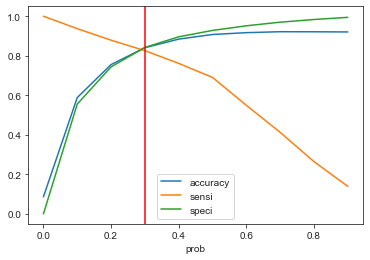

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x = 0.3, color = 'r', linestyle = '-')
plt.show()

In [110]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

is_churn  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0         0         0.407769          0    1    1    1    1    1    0    0   
1         0         0.188431          0    1    1    0    0    0    0    0   
2         0         0.087799          0    1    0    0    0    0    0    0   
3         0         0.121003          0    1    1    0    0    0    0    0   
4         0         0.020436          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  Final_Predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

In [111]:
evaluation_matrix(y_train_pred_final.is_churn, y_train_pred_final.Final_Predicted)

The Confusion matrx is:
 [[16164  3028]
 [  316  1499]]
The Accuracy Score is : 0.84
Recall: 0.8259
Specificity: 0.8422
Precision: 0.3311
AUC score : 0.8341


In [112]:
# Predicting on the test set
y_test_pred = model.predict_proba(df_test_pca)[:,1]

In [113]:
y_test_pred_final = pd.DataFrame({"is_churn": y_test, "Conversion_Prob": y_test_pred})
y_test_pred_final.head()

is_churn  Conversion_Prob
50179         0         0.514380
20587         0         0.057001
51116         0         0.001271
70628         0         0.037721
75091         0         0.154427

In [114]:
# As optimal cut-off point is 0.1
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_pred_final.head()

is_churn  Conversion_Prob  Final_Predicted
50179         0         0.514380                1
20587         0         0.057001                0
51116         0         0.001271                0
70628         0         0.037721                0
75091         0         0.154427                1

In [115]:
evaluation_matrix(y_test_pred_final.is_churn, y_test_pred_final.Final_Predicted)

The Confusion matrx is:
 [[4562 3664]
 [  58  720]]
The Accuracy Score is : 0.59
Recall: 0.9254
Specificity: 0.5546
Precision: 0.1642
AUC score : 0.74


In [116]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['PCA + Logistic Regression'],
                            'train_accuracy': [accuracy_score(y_train_pred_final.is_churn, y_train_pred_final.Final_Predicted).round(4)],
                            'train_recall': [recall_score(y_train_pred_final.is_churn, y_train_pred_final.Final_Predicted).round(4)],
                            'train_precision': [precision_score(y_train_pred_final.is_churn, y_train_pred_final.Final_Predicted).round(4)],
                            'test_accuracy' : [accuracy_score(y_test_pred_final.is_churn, y_test_pred_final.Final_Predicted).round(4)],
                            'test_recall': [recall_score(y_test_pred_final.is_churn, y_test_pred_final.Final_Predicted).round(4)],
                            'test_precision': [precision_score(y_test_pred_final.is_churn, y_test_pred_final.Final_Predicted).round(4)]
                          })
temp
Final_score_3 = pd.concat([Final_score_3, temp])
Final_score_3

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   
0                       PCA + Logistic Regression          0.8408   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339  
0        0.8259           0.3311         0.5866       0.9254          0.1642

- The logistic regression model was applied an reduced dimensions, It is able to predict false negative values as 82% and 92% for train and test datasets respectively.
- The model has higher accuracy for the training dataset which is 84% as compared to the test dataset of 58.66%.

## 5.5 Decision Tree Classifier

In [117]:
# Shape of each matrix
X_train.shape,  X_test.shape , y_train.shape , y_test.shape

((21007, 130), (9004, 130), (21007,), (9004,))

### A. Without HyperParameter

In [118]:
# Instantiating the decision tree classifier without hyperparameters
dto = DecisionTreeClassifier(max_depth=10, random_state=100, class_weight='balanced')

# Fitting on train dataset
dto.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=100)

In [119]:
# Plotting decision tree based on train datset
# plt.figure(figsize=(40,30))
# plot_tree(dto,feature_names = pd.DataFrame(X_train).columns, class_names= ['churn', 'not_churn'], filled=True);

In [120]:
# Predicting
y_train_pred_dto = dto.predict(X_train)
y_test_pred_dto = dto.predict(X_test)

In [121]:
# evaluation_matrix for train dataset
evaluation_matrix(y_train, y_train_pred_dto)

The Confusion matrx is:
 [[17566  1626]
 [   36  1779]]
The Accuracy Score is : 0.92
Recall: 0.9802
Specificity: 0.9153
Precision: 0.5225
AUC score : 0.9477


In [122]:
# evaluation_matrix for test dataset
evaluation_matrix(y_test, y_test_pred_dto)

The Confusion matrx is:
 [[7366  860]
 [ 197  581]]
The Accuracy Score is : 0.88
Recall: 0.7468
Specificity: 0.8955
Precision: 0.4032
AUC score : 0.8211


In [123]:
# Creating dataset for important features
fet_imp = pd.DataFrame({'variables': X_train.columns, 
                        'Importance': dto.feature_importances_})
fet_imp.sort_values(by = 'Importance', ascending= False).head()

variables  Importance
80         total_ic_mou_8    0.463552
14          roam_og_mou_8    0.092566
129        days_last_rech    0.053194
126            delta_arpu    0.042230
128  delta_total_rech_amt    0.033834

In [124]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['DecisionTreeClassifier_without_hyperpara'],
                            'train_accuracy': [accuracy_score(y_train, np.round(abs(y_train_pred_dto))).round(4)],
                            'train_recall': [recall_score(y_train, np.round(abs(y_train_pred_dto))).round(4)],
                            'train_precision': [precision_score(y_train, np.round(abs(y_train_pred_dto))).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, np.round(abs(y_test_pred_dto))).round(4)],
                            'test_recall': [recall_score(y_test, np.round(abs(y_test_pred_dto))).round(4)],
                            'test_precision': [precision_score(y_test, np.round(abs(y_test_pred_dto))).round(4)]
                          })
temp
Final_score_4 = pd.concat([Final_score_3, temp])
Final_score_4

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   
0                       PCA + Logistic Regression          0.8408   
0        DecisionTreeClassifier_without_hyperpara          0.9209   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339  
0        0.8259           0.3311         0.5866       0.9254          0.1642  
0        0.9802           0.5225         0.8826       0.7468          0.4032

- Decision Tree Classifier is built with the initial depth of 10 , which gives the 0.98 and 0.74 recall score for train and test datasets. 
- The accuracy result were obtained as 0.92 and 0.88 for the train and test datasets.
- The result of the classifier shows that 'total_ic_mou_8' variable is important interms of the predicting the churn customer.

### B. With HyperParameter Tuning

In [125]:
# Instantiating the DecisionTreeClassifier
dthp = DecisionTreeClassifier(random_state=100,class_weight='balanced')

In [126]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20, 30 , 50],
    'min_samples_leaf': [20, 50,100,200,300,500],
    'criterion': ['gini']
}

In [127]:
# using the cross validation method
grid_search_hp = GridSearchCV(estimator= dthp,
                                param_grid= params,
                                cv = 5, 
                                n_jobs=-1, 
                                verbose=1,
                                scoring='roc_auc')

In [128]:
%%time
#fitting 1min
grid_search_hp.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 1.16 s
Wall time: 39.5 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [5, 10, 20, 30, 50],
                         'min_samples_leaf': [20, 50, 100, 200, 300, 500]},
             scoring='roc_auc', verbose=1)

In [129]:
# Creating dataframe with best results
rf_hp = pd.DataFrame(grid_search_hp.cv_results_)
rf_hp.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.743899      0.037383         0.009374        0.007654   
1       0.667325      0.007555         0.012500        0.006250   
2       0.717911      0.056678         0.009375        0.007654   
3       0.680589      0.020041         0.012500        0.006250   
4       0.613278      0.006365         0.006250        0.007654   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                     20   
1            gini               5                     50   
2            gini               5                    100   
3            gini               5                    200   
4            gini               5                    300   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.898459   
1  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.901319   
2  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.911927   
3  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.911506   
4  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.910581   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.923766           0.919189           0.895678           0.909305   
1           0.928151           0.919127           0.899120           0.910844   
2           0.929090           0.917888           0.900187           0.915827   
3           0.929453           0.920662           0.895778           0.910848   
4           0.927873           0.917206           0.892773           0.908262   

   mean_test_score  std_test_score  rank_test_score  
0         0.909279        0.011047               16  
1         0.911712        0.010886               12  
2         0.914984        0.009343                1  
3         0.913649        0.011232                2  
4         0.911339        0.011511               13

In [130]:
# looking for the top 5 results
rf_hp.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2        0.717911      0.056678         0.009375        0.007654   
3        0.680589      0.020041         0.012500        0.006250   
15       0.949278      0.048186         0.009374        0.007654   
21       0.942947      0.037294         0.010599        0.006489   
27       0.981718      0.055881         0.004325        0.006108   

   param_criterion param_max_depth param_min_samples_leaf  \
2             gini               5                    100   
3             gini               5                    200   
15            gini              20                    200   
21            gini              30                    200   
27            gini              50                    200   

                                               params  split0_test_score  \
2   {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.911927   
3   {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.911506   
15  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.911408   
21  {'criterion': 'gini', 'max_depth': 30, 'min_sa...           0.911408   
27  {'criterion': 'gini', 'max_depth': 50, 'min_sa...           0.911408   

    split1_test_score  split2_test_score  split3_test_score  \
2            0.929090           0.917888           0.900187   
3            0.929453           0.920662           0.895778   
15           0.929948           0.918767           0.889362   
21           0.929948           0.918767           0.889362   
27           0.929948           0.918767           0.889362   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
2            0.915827         0.914984        0.009343                1  
3            0.910848         0.913649        0.011232                2  
15           0.912724         0.912442        0.013269                3  
21           0.912724         0.912442        0.013269                3  
27           0.912724         0.912442        0.013269                3

In [131]:
# Best estimator
best = grid_search_hp.best_estimator_
best

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=100, random_state=100)

In [132]:
X_test.shape

(9004, 130)

In [133]:
# Predicting
y_train_pred_dthp = best.predict(X_train)
y_test_pred_dthp = best.predict(X_test)

In [134]:
# evaluation_matrix for train dataset
evaluation_matrix(y_train, y_train_pred_dthp)

The Confusion matrx is:
 [[16591  2601]
 [  241  1574]]
The Accuracy Score is : 0.86
Recall: 0.8672
Specificity: 0.8645
Precision: 0.377
AUC score : 0.8658


In [135]:
# evaluation_matrix for test dataset
evaluation_matrix(y_test, y_test_pred_dthp)

The Confusion matrx is:
 [[7070 1156]
 [ 137  641]]
The Accuracy Score is : 0.86
Recall: 0.8239
Specificity: 0.8595
Precision: 0.3567
AUC score : 0.8417


In [136]:
# # Creating dataset for important features
# fet_imp = pd.DataFrame({'variables': X_train.columns, 
#                         'Importance': grid_search_hp.feature_importances_})
# fet_imp.sort_values(by = 'Importance', ascending= False).head()

In [137]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['DecisionTreeClassifier_with_hyperpara'],
                            'train_accuracy': [accuracy_score(y_train, np.round(abs(y_train_pred_dthp))).round(4)],
                            'train_recall': [recall_score(y_train, np.round(abs(y_train_pred_dthp))).round(4)],
                            'train_precision': [precision_score(y_train, np.round(abs(y_train_pred_dthp))).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, np.round(abs(y_test_pred_dthp))).round(4)],
                            'test_recall': [recall_score(y_test, np.round(abs(y_test_pred_dthp))).round(4)],
                            'test_precision': [precision_score(y_test, np.round(abs(y_test_pred_dthp))).round(4)]
                          })
temp
Final_score_5 = pd.concat([Final_score_4, temp])
Final_score_5

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   
0                       PCA + Logistic Regression          0.8408   
0        DecisionTreeClassifier_without_hyperpara          0.9209   
0           DecisionTreeClassifier_with_hyperpara          0.8647   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339  
0        0.8259           0.3311         0.5866       0.9254          0.1642  
0        0.9802           0.5225         0.8826       0.7468          0.4032  
0        0.8672           0.3770         0.8564       0.8239          0.3567

- The Decision tree Classifier algorithmn with the hyperparameter tuning gives the recall value of 0.86 and 0.82 for the train and test datasets respectively for depth of treea as 5 and min sample leaf of 100.

## 5.6 Random Forest Classifier

### A. Without hyperparameters

In [138]:
# instantiating the RandomForestClassifier with 10 decision trees and initial depth as 10
RF = RandomForestClassifier(random_state = 100, n_estimators = 10, max_depth = 10, class_weight='balanced', oob_score= True)

# fitting it on train dataset
RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=10,
                       oob_score=True, random_state=100)

In [139]:
# taking 1st parameter for tree
est = RF.estimators_[0]
est

DecisionTreeClassifier(max_depth=10, max_features='auto',
                       random_state=186422792)

In [140]:
# Plotting decision tree

# plt.figure(figsize=(60,30))
# plot_tree(est, feature_names = pd.DataFrame(X_train).columns, class_names= ['churn', 'not_churn'], filled=True);

In [141]:
# Prediction
y_train_pred_rf = RF.predict(X_train)
y_test_pred_rf = RF.predict(X_test)

In [142]:
# Evaluation matrix for Train
evaluation_matrix(y_train, np.round(abs(y_train_pred_rf)))

The Confusion matrx is:
 [[18418   774]
 [  169  1646]]
The Accuracy Score is : 0.96
Recall: 0.9069
Specificity: 0.9597
Precision: 0.6802
AUC score : 0.9333


In [143]:
# Evaluation matrix for Train
evaluation_matrix(y_test, np.round(abs(y_test_pred_rf)))

The Confusion matrx is:
 [[7817  409]
 [ 247  531]]
The Accuracy Score is : 0.93
Recall: 0.6825
Specificity: 0.9503
Precision: 0.5649
AUC score : 0.8164


In [144]:
# looking for the oob score
print(RF.oob_score_)

0.9175036892464417


In [145]:
# # Creating dataset for important features
fet_imp = pd.DataFrame({'variables': X_train.columns, 
                        'Importance': RF.feature_importances_})
fet_imp.sort_values(by = 'Importance', ascending= False).head()

variables  Importance
101    last_day_rch_amt_8    0.094438
128  delta_total_rech_amt    0.080121
80         total_ic_mou_8    0.071520
2                  arpu_8    0.050836
65           loc_ic_mou_8    0.050829

In [146]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['RandomForestClassifier_without_hyperpara'],
                            'train_accuracy': [accuracy_score(y_train, np.round(abs(y_train_pred_rf))).round(4)],
                            'train_recall': [recall_score(y_train, np.round(abs(y_train_pred_rf))).round(4)],
                            'train_precision': [precision_score(y_train, np.round(abs(y_train_pred_rf))).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, np.round(abs(y_test_pred_rf))).round(4)],
                            'test_recall': [recall_score(y_test, np.round(abs(y_test_pred_rf))).round(4)],
                            'test_precision': [precision_score(y_test, np.round(abs(y_test_pred_rf))).round(4)]
                          })
temp
Final_score_6 = pd.concat([Final_score_5, temp])
Final_score_6

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   
0                       PCA + Logistic Regression          0.8408   
0        DecisionTreeClassifier_without_hyperpara          0.9209   
0           DecisionTreeClassifier_with_hyperpara          0.8647   
0        RandomForestClassifier_without_hyperpara          0.9551   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339  
0        0.8259           0.3311         0.5866       0.9254          0.1642  
0        0.9802           0.5225         0.8826       0.7468          0.4032  
0        0.8672           0.3770         0.8564       0.8239          0.3567  
0        0.9069           0.6802         0.9271       0.6825          0.5649

- Random forest classifier without hyper parameter tuning gives the recall score of 0.90 and 0.68 for the train and test datasets respectively for the initial tree with the depth as 10. 
- The important variable for the prediction is observed as 'last_day_rch_amt_8".

### B. With Hyperparameters

In [147]:
# Instantiating the RandomStateClassifier
rf = RandomForestClassifier(random_state= 100, n_jobs = -1, class_weight='balanced', oob_score= True)

In [148]:
# Hyperparameter
params = {
    'n_estimators' : [10, 25, 50, 100],
    'max_depth': [5, 10, 20, 30, 40],
    'min_samples_leaf': [20, 50, 100, 200],
    'n_estimators': [10,50, 100, 200]
}

In [149]:
# GridsearchCV
Grid_se = GridSearchCV(estimator= rf,
                        param_grid= params,
                        cv= 5,
                        n_jobs=-1, 
                        verbose= 1, 
                        scoring= 'recall') 

In [150]:
%%time
# fitting 19 mins
Grid_se.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
CPU times: total: 7.75 s
Wall time: 9min 57s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 40],
                         'min_samples_leaf': [20, 50, 100, 200],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='recall', verbose=1)

In [151]:
# Taking out the best parameters
rf_best = Grid_se.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=200, n_jobs=-1, oob_score=True,
                       random_state=100)

In [152]:
# Prediction
y_train_pred_rfhp = rf_best.predict(X_train)
y_test_pred_rfhp = rf_best.predict(X_test)

In [153]:
# Evaluation matrix for Train
evaluation_matrix(y_train, np.round(abs(y_train_pred_rfhp)))

The Confusion matrx is:
 [[17118  2074]
 [  285  1530]]
The Accuracy Score is : 0.89
Recall: 0.843
Specificity: 0.8919
Precision: 0.4245
AUC score : 0.8675


In [154]:
# Evaluation matrix for Train
evaluation_matrix(y_test, np.round(abs(y_test_pred_rfhp)))

The Confusion matrx is:
 [[7352  874]
 [ 159  619]]
The Accuracy Score is : 0.89
Recall: 0.7956
Specificity: 0.8938
Precision: 0.4146
AUC score : 0.8447


In [155]:
best = rf_best.estimators_[0]
best

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=200,
                       random_state=186422792)

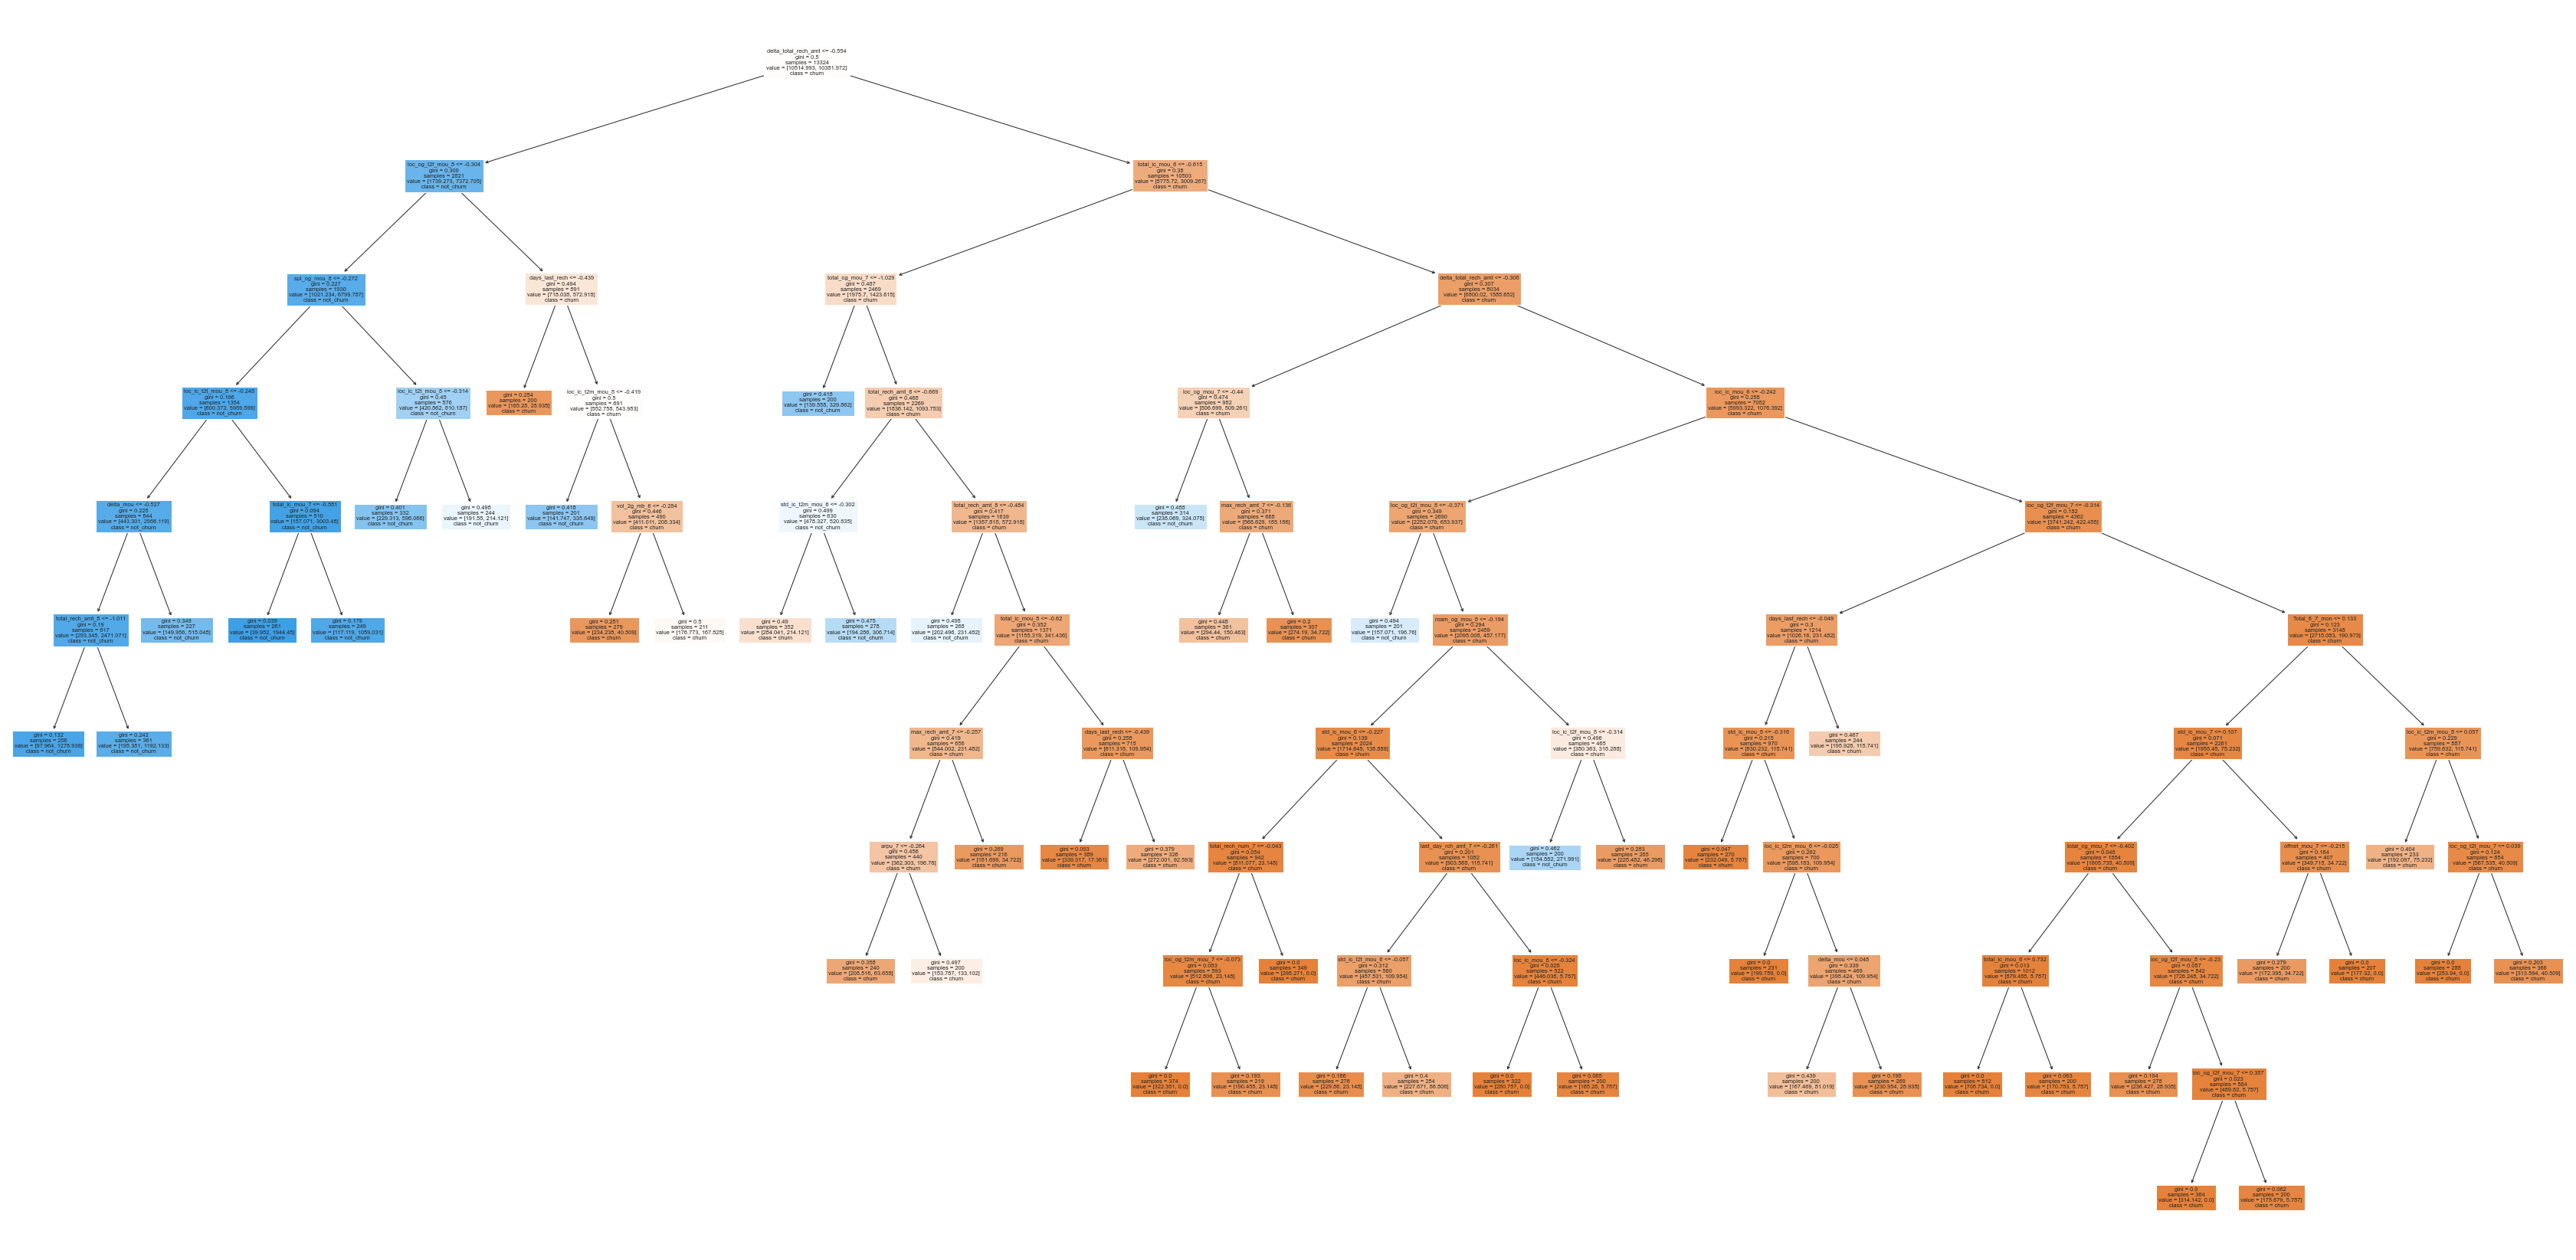

In [156]:
# Plotting decision tree

plt.figure(figsize=(60,30))
plot_tree(best, feature_names = pd.DataFrame(X_train).columns, class_names= ['churn', 'not_churn'], filled=True);

In [157]:
# # Creating dataset for important features
# fet_imp = pd.DataFrame({'variables': X_train.columns, 
#                         'Importance': rf.feature_importances_})
# fet_imp.sort_values(by = 'Importance', ascending= False).head()

In [158]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['RandomForestClassifier_with_hyperpara'],
                            'train_accuracy': [accuracy_score(y_train, np.round(abs(y_train_pred_rfhp))).round(4)],
                            'train_recall': [recall_score(y_train, np.round(abs(y_train_pred_rfhp))).round(4)],
                            'train_precision': [precision_score(y_train, np.round(abs(y_train_pred_rfhp))).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, np.round(abs(y_test_pred_rfhp))).round(4)],
                            'test_recall': [recall_score(y_test, np.round(abs(y_test_pred_rfhp))).round(4)],
                            'test_precision': [precision_score(y_test, np.round(abs(y_test_pred_rfhp))).round(4)]
                          })
temp
Final_score_7 = pd.concat([Final_score_6, temp])
Final_score_7

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   
0                       PCA + Logistic Regression          0.8408   
0        DecisionTreeClassifier_without_hyperpara          0.9209   
0           DecisionTreeClassifier_with_hyperpara          0.8647   
0        RandomForestClassifier_without_hyperpara          0.9551   
0           RandomForestClassifier_with_hyperpara          0.8877   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339  
0        0.8259           0.3311         0.5866       0.9254          0.1642  
0        0.9802           0.5225         0.8826       0.7468          0.4032  
0        0.8672           0.3770         0.8564       0.8239          0.3567  
0        0.9069           0.6802         0.9271       0.6825          0.5649  
0        0.8430           0.4245         0.8853       0.7956          0.4146

- With the hyperparameter tuning of random forest classifier, the recall score is observed as 0.89 and 0.74 for the train and test datasets respectively. The optimum tree has the maximum level as 10 and min samples in the leaf is 20.

## 5.7 Logistic Regression 

In [159]:
# taking LogisticRegression
logreg = LogisticRegression(random_state=100, class_weight= {1:0.8, 0:0.2})

# selecting 30 variables from the rfe
rfe = RFE(logreg, n_features_to_select=30)

In [160]:
#fitting
rfe = rfe.fit(X_train, y_train)

In [161]:
# Take a look at variables which is used for the further analysis
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('arpu_6', False, 37),
 ('arpu_7', True, 1),
 ('arpu_8', False, 4),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 87),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 27),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 31),
 ('roam_ic_mou_7', False, 82),
 ('roam_ic_mou_8', False, 54),
 ('roam_og_mou_6', False, 30),
 ('roam_og_mou_7', False, 10),
 ('roam_og_mou_8', False, 2),
 ('loc_og_t2t_mou_6', False, 63),
 ('loc_og_t2t_mou_7', False, 28),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 90),
 ('loc_og_t2m_mou_8', False, 55),
 ('loc_og_t2f_mou_6', False, 52),
 ('loc_og_t2f_mou_7', False, 75),
 ('loc_og_t2f_mou_8', False, 9),
 ('loc_og_t2c_mou_6', False, 92),
 ('loc_og_t2c_mou_7', False, 77),
 ('loc_og_t2c_mou_8', False, 76),
 ('loc_og_mou_6', False, 39),
 ('loc_og_mou_7', False, 89),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 29),
 ('std_og_t2t_mou_7', False, 26),
 ('std_og_t2t_mou_

In [162]:
# creating the variable which stores the supporting column
c_rfe = X_train.columns[rfe.support_]
c_rfe

Index(['arpu_7', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_mou_8', 'std_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_7', 'ic_others_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aon', 'sep_vbc_3g', 'delta_mou',
       'days_last_rech'],
      dtype='object')

##### Model 1

In [163]:
# adding the constant term and model fitting
X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20976
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3672.6
Date:                Wed, 21 Dec 2022   Deviance:                       7345.3
Time:                        17:13:48   Pearson chi2:                 7.97e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2123
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1200      0.079    -52.402      0.000      -4.274      -3.966
arpu_7                 0.3830      0.052      7.394      0.000       0.281       0.485
onnet_mou_6            0.5757      0.095      6.064      0.000       0.390       0.762
onnet_mou_8            0.2700      0.119      2.268      0.023       0.037       0.503
offnet_mou_6           0.5872      0.096      6.141      0.000       0.400       0.775
offnet_mou_8           0.2068      0.120      1.719      0.086      -0.029       0.443
loc_og_t2t_mou_8      -0.1764      0.178     -0.991      0.322      -0.525       0.173
loc_og_t2m_mou_6      -0.2531      0.059     -4.283      0.000      -0.369      -0.137
loc_og_mou_8           0.2064      0.480      0.430      0.667      -0.734       1.147
std_og_mou_8           0.6614      0.774      0.855      0.393      -0.855       2.177
total_og_mou_6        -1.7644      0.200     -8.826      0.000      -2.156      -1.373
total_og_mou_7        -1.0767      0.176     -6.133      0.000      -1.421      -0.733
total_og_mou_8         0.5337      0.929      0.574      0.566      -1.288       2.355
loc_ic_mou_8           3.5472      0.615      5.772      0.000       2.343       4.752
std_ic_t2m_mou_7      -0.2122      0.051     -4.145      0.000      -0.313      -0.112
std_ic_t2m_mou_8       0.3280      0.194      1.688      0.091      -0.053       0.709
std_ic_mou_8           1.7161      0.337      5.092      0.000       1.056       2.377
total_ic_mou_6        -0.4969      0.121     -4.114      0.000      -0.734      -0.260
total_ic_mou_8        -5.1891      0.728     -7.129      0.000      -6.616      -3.762
spl_ic_mou_8          -0.5393      0.087     -6.169      0.000      -0.711      -0.368
isd_ic_mou_8           1.1119      0.160      6.934      0.000       0.798       1.426
ic_others_7           -0.2761      0.122     -2.263      0.024      -0.515      -0.037
ic_others_8            0.3186      0.070      4.580      0.000       0.182       0.455
last_day_rch_amt_8    -0.5986      0.066     -9.110      0.000      -0.727      -0.470
monthly_2g_8          -0.5182      0.074     -6.999      0.000      -0.663      -0.373
sachet_2g_8           -0.3192      0.061     -5.265      0.000      -0.438      -0.200
monthly_3g_8          -0.7095      0.086     -8.266      0.000      -0.878      -0.541
aon                   -0.2852      0.041     -6.922      0.000      -0.366      -0.204
sep_vbc_3g            -0.9170      0.248     -3.699      0.000      -1.403      -0.431
delta_mou             -2.1867      0.287     -7.613      0.000      -2.750      -1.624
days_last_rech         0.2826      0.026     10.890      0.000       0.232       0.333
======================================================================================
"""

In [164]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[-1])]
vif['VIF'] = round(vif['VIF'],2) 
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

Features     VIF
17      total_ic_mou_8  367.06
11      total_og_mou_8  341.78
12        loc_ic_mou_8  258.29
8         std_og_mou_8  179.76
7         loc_og_mou_8   62.83
28           delta_mou   58.91
15        std_ic_mou_8   57.27
9       total_og_mou_6   49.05
4         offnet_mou_8   29.20
2          onnet_mou_8   28.22
10      total_og_mou_7   24.63
3         offnet_mou_6   17.95
1          onnet_mou_6   17.51
19        isd_ic_mou_8   16.37
16      total_ic_mou_6   11.75
14    std_ic_t2m_mou_8    4.82
5     loc_og_t2t_mou_8    3.89
21         ic_others_8    2.73
6     loc_og_t2m_mou_6    2.61
13    std_ic_t2m_mou_7    2.43
20         ic_others_7    2.10
0               arpu_7    2.03
29      days_last_rech    1.27
22  last_day_rch_amt_8    1.21
25        monthly_3g_8    1.15
26                 aon    1.12
23        monthly_2g_8    1.04
24         sachet_2g_8    1.04
27          sep_vbc_3g    1.04
18        spl_ic_mou_8    1.04

In [165]:
# Dropping the variable with hight VIF score
c_rfe = c_rfe.drop('total_ic_mou_8', 1)

##### Model 2

In [166]:
# adding the constant term and model fitting

X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20977
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3688.6
Date:                Wed, 21 Dec 2022   Deviance:                       7377.3
Time:                        17:13:50   Pearson chi2:                 1.44e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.2111
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1191      0.078    -52.831      0.000      -4.272      -3.966
arpu_7                 0.4605      0.056      8.245      0.000       0.351       0.570
onnet_mou_6            0.5363      0.094      5.698      0.000       0.352       0.721
onnet_mou_8            0.3025      0.117      2.585      0.010       0.073       0.532
offnet_mou_6           0.5479      0.095      5.780      0.000       0.362       0.734
offnet_mou_8           0.2502      0.119      2.103      0.035       0.017       0.483
loc_og_t2t_mou_8      -0.1918      0.178     -1.079      0.281      -0.540       0.157
loc_og_t2m_mou_6      -0.2649      0.059     -4.525      0.000      -0.380      -0.150
loc_og_mou_8           3.4194      0.259     13.184      0.000       2.911       3.928
std_og_mou_8           6.0669      0.385     15.777      0.000       5.313       6.821
total_og_mou_6        -1.7263      0.198     -8.697      0.000      -2.115      -1.337
total_og_mou_7        -1.1542      0.174     -6.637      0.000      -1.495      -0.813
total_og_mou_8        -5.4713      0.554     -9.869      0.000      -6.558      -4.385
loc_ic_mou_8          -0.7617      0.149     -5.111      0.000      -1.054      -0.470
std_ic_t2m_mou_7      -0.2216      0.051     -4.315      0.000      -0.322      -0.121
std_ic_t2m_mou_8       0.3216      0.193      1.662      0.096      -0.058       0.701
std_ic_mou_8          -0.2955      0.185     -1.600      0.110      -0.658       0.067
total_ic_mou_6        -0.5276      0.119     -4.439      0.000      -0.760      -0.295
spl_ic_mou_8          -0.5385      0.088     -6.145      0.000      -0.710      -0.367
isd_ic_mou_8           0.0489      0.058      0.844      0.398      -0.065       0.162
ic_others_7           -0.2751      0.122     -2.264      0.024      -0.513      -0.037
ic_others_8            0.1314      0.064      2.045      0.041       0.005       0.257
last_day_rch_amt_8    -0.5929      0.067     -8.857      0.000      -0.724      -0.462
monthly_2g_8          -0.5285      0.074     -7.138      0.000      -0.674      -0.383
sachet_2g_8           -0.3182      0.061     -5.230      0.000      -0.437      -0.199
monthly_3g_8          -0.7288      0.086     -8.487      0.000      -0.897      -0.560
aon                   -0.3036      0.041     -7.407      0.000      -0.384      -0.223
sep_vbc_3g            -0.9313      0.249     -3.735      0.000      -1.420      -0.443
delta_mou             -2.2388      0.284     -7.873      0.000      -2.796      -1.681
days_last_rech         0.2890      0.026     11.251      0.000       0.239       0.339
======================================================================================
"""

In [167]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[-1])]
vif['VIF'] = round(vif['VIF'],2) 
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

Features     VIF
11      total_og_mou_8  250.87
8         std_og_mou_8  126.36
27           delta_mou   57.86
9       total_og_mou_6   49.04
7         loc_og_mou_8   44.62
4         offnet_mou_8   25.80
2          onnet_mou_8   25.10
10      total_og_mou_7   23.90
3         offnet_mou_6   17.85
1          onnet_mou_6   17.39
16      total_ic_mou_6   11.56
12        loc_ic_mou_8    9.00
15        std_ic_mou_8    5.19
14    std_ic_t2m_mou_8    4.81
5     loc_og_t2t_mou_8    3.89
6     loc_og_t2m_mou_6    2.60
13    std_ic_t2m_mou_7    2.42
20         ic_others_8    2.11
19         ic_others_7    2.10
0               arpu_7    1.98
18        isd_ic_mou_8    1.47
21  last_day_rch_amt_8    1.20
28      days_last_rech    1.18
24        monthly_3g_8    1.15
25                 aon    1.11
23         sachet_2g_8    1.04
26          sep_vbc_3g    1.04
17        spl_ic_mou_8    1.04
22        monthly_2g_8    1.03

In [168]:
# Dropping the variable with hight VIF score

c_rfe = c_rfe.drop('total_og_mou_8', 1)

##### Model 3

In [169]:
# adding the constant term and model fitting

X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20978
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3739.2
Date:                Wed, 21 Dec 2022   Deviance:                       7478.4
Time:                        17:13:51   Pearson chi2:                 7.60e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.2073
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1939      0.079    -53.255      0.000      -4.348      -4.040
arpu_7                 0.3637      0.054      6.714      0.000       0.258       0.470
onnet_mou_6            0.5877      0.095      6.193      0.000       0.402       0.774
onnet_mou_8            0.4130      0.113      3.643      0.000       0.191       0.635
offnet_mou_6           0.6123      0.095      6.413      0.000       0.425       0.799
offnet_mou_8           0.3698      0.115      3.218      0.001       0.145       0.595
loc_og_t2t_mou_8      -0.3393      0.167     -2.032      0.042      -0.667      -0.012
loc_og_t2m_mou_6      -0.3172      0.057     -5.592      0.000      -0.428      -0.206
loc_og_mou_8           2.0081      0.197     10.198      0.000       1.622       2.394
std_og_mou_8           3.3366      0.252     13.263      0.000       2.844       3.830
total_og_mou_6        -2.9412      0.162    -18.191      0.000      -3.258      -2.624
total_og_mou_7        -2.5029      0.115    -21.827      0.000      -2.728      -2.278
loc_ic_mou_8          -0.1515      0.126     -1.200      0.230      -0.399       0.096
std_ic_t2m_mou_7      -0.4118      0.051     -8.007      0.000      -0.513      -0.311
std_ic_t2m_mou_8       0.5878      0.192      3.069      0.002       0.212       0.963
std_ic_mou_8          -0.1226      0.181     -0.679      0.497      -0.477       0.231
total_ic_mou_6        -1.3703      0.081    -16.817      0.000      -1.530      -1.211
spl_ic_mou_8          -0.5529      0.088     -6.267      0.000      -0.726      -0.380
isd_ic_mou_8           0.0579      0.087      0.667      0.505      -0.112       0.228
ic_others_7           -0.3696      0.130     -2.845      0.004      -0.624      -0.115
ic_others_8            0.2072      0.064      3.233      0.001       0.082       0.333
last_day_rch_amt_8    -0.6392      0.069     -9.238      0.000      -0.775      -0.504
monthly_2g_8          -0.5355      0.074     -7.220      0.000      -0.681      -0.390
sachet_2g_8           -0.3373      0.062     -5.425      0.000      -0.459      -0.215
monthly_3g_8          -0.6754      0.085     -7.951      0.000      -0.842      -0.509
aon                   -0.3237      0.041     -7.980      0.000      -0.403      -0.244
sep_vbc_3g            -0.9693      0.262     -3.698      0.000      -1.483      -0.456
delta_mou             -4.5100      0.180    -25.071      0.000      -4.863      -4.157
days_last_rech         0.3232      0.025     13.118      0.000       0.275       0.372
======================================================================================
"""

In [170]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[-1])]
vif['VIF'] = round(vif['VIF'],2) 
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

Features    VIF
8         std_og_mou_8  66.76
9       total_og_mou_6  37.64
26           delta_mou  31.41
7         loc_og_mou_8  26.04
4         offnet_mou_8  24.79
2          onnet_mou_8  24.25
3         offnet_mou_6  17.48
1          onnet_mou_6  17.06
10      total_og_mou_7  14.61
15      total_ic_mou_6   7.58
11        loc_ic_mou_8   6.08
13    std_ic_t2m_mou_8   4.72
14        std_ic_mou_8   4.60
5     loc_og_t2t_mou_8   3.88
6     loc_og_t2m_mou_6   2.60
12    std_ic_t2m_mou_7   2.28
19         ic_others_8   2.10
18         ic_others_7   2.09
0               arpu_7   1.87
17        isd_ic_mou_8   1.33
20  last_day_rch_amt_8   1.20
27      days_last_rech   1.15
23        monthly_3g_8   1.14
24                 aon   1.11
22         sachet_2g_8   1.04
25          sep_vbc_3g   1.04
16        spl_ic_mou_8   1.04
21        monthly_2g_8   1.03

In [171]:
# Dropping the variable with hight VIF score

c_rfe = c_rfe.drop('total_og_mou_6', 1)

##### Model 4

In [172]:
# adding the constant term and model fitting

X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20979
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3899.8
Date:                Wed, 21 Dec 2022   Deviance:                       7799.6
Time:                        17:13:52   Pearson chi2:                 7.59e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1950
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0410      0.074    -54.305      0.000      -4.187      -3.895
arpu_7                 0.4173      0.047      8.915      0.000       0.326       0.509
onnet_mou_6           -0.8977      0.065    -13.771      0.000      -1.025      -0.770
onnet_mou_8            1.0834      0.117      9.239      0.000       0.854       1.313
offnet_mou_6          -0.8749      0.066    -13.201      0.000      -1.005      -0.745
offnet_mou_8           1.0227      0.110      9.300      0.000       0.807       1.238
loc_og_t2t_mou_8      -0.4757      0.168     -2.837      0.005      -0.804      -0.147
loc_og_t2m_mou_6      -0.3845      0.057     -6.758      0.000      -0.496      -0.273
loc_og_mou_8           0.7447      0.178      4.195      0.000       0.397       1.093
std_og_mou_8           1.0183      0.215      4.738      0.000       0.597       1.440
total_og_mou_7        -1.8396      0.105    -17.571      0.000      -2.045      -1.634
loc_ic_mou_8          -0.2505      0.118     -2.117      0.034      -0.482      -0.019
std_ic_t2m_mou_7      -0.2449      0.046     -5.351      0.000      -0.335      -0.155
std_ic_t2m_mou_8       0.2796      0.186      1.500      0.134      -0.086       0.645
std_ic_mou_8          -0.1246      0.173     -0.720      0.472      -0.464       0.215
total_ic_mou_6        -0.9548      0.076    -12.529      0.000      -1.104      -0.805
spl_ic_mou_8          -0.5922      0.089     -6.622      0.000      -0.767      -0.417
isd_ic_mou_8          -0.0026      0.066     -0.039      0.969      -0.131       0.126
ic_others_7           -0.3312      0.129     -2.560      0.010      -0.585      -0.078
ic_others_8            0.1578      0.071      2.236      0.025       0.019       0.296
last_day_rch_amt_8    -0.7034      0.071     -9.871      0.000      -0.843      -0.564
monthly_2g_8          -0.5503      0.073     -7.488      0.000      -0.694      -0.406
sachet_2g_8           -0.3853      0.063     -6.116      0.000      -0.509      -0.262
monthly_3g_8          -0.5709      0.077     -7.442      0.000      -0.721      -0.421
aon                   -0.3607      0.040     -9.090      0.000      -0.439      -0.283
sep_vbc_3g            -1.0221      0.265     -3.861      0.000      -1.541      -0.503
delta_mou             -3.0907      0.154    -20.120      0.000      -3.392      -2.790
days_last_rech         0.3748      0.023     16.082      0.000       0.329       0.420
======================================================================================
"""

In [173]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[-1])]
vif['VIF'] = round(vif['VIF'],2) 
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

Features    VIF
8         std_og_mou_8  55.44
25           delta_mou  27.29
4         offnet_mou_8  23.72
2          onnet_mou_8  23.11
7         loc_og_mou_8  22.76
9       total_og_mou_7  13.69
14      total_ic_mou_6   7.19
10        loc_ic_mou_8   5.72
3         offnet_mou_6   5.52
1          onnet_mou_6   5.23
12    std_ic_t2m_mou_8   4.69
13        std_ic_mou_8   4.56
5     loc_og_t2t_mou_8   3.87
6     loc_og_t2m_mou_6   2.58
11    std_ic_t2m_mou_7   2.24
17         ic_others_7   2.09
18         ic_others_8   2.09
0               arpu_7   1.87
16        isd_ic_mou_8   1.29
19  last_day_rch_amt_8   1.20
22        monthly_3g_8   1.14
26      days_last_rech   1.14
23                 aon   1.11
21         sachet_2g_8   1.04
24          sep_vbc_3g   1.04
15        spl_ic_mou_8   1.04
20        monthly_2g_8   1.03

In [174]:
# Dropping the variable with hight VIF score

c_rfe = c_rfe.drop('delta_mou', 1)

##### Model 5

In [175]:
# adding the constant term and model fitting

X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20980
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4144.0
Date:                Wed, 21 Dec 2022   Deviance:                       8288.0
Time:                        17:13:54   Pearson chi2:                 4.30e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1761
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9007      0.071    -54.851      0.000      -4.040      -3.761
arpu_7                 0.2405      0.045      5.343      0.000       0.152       0.329
onnet_mou_6            0.2369      0.031      7.619      0.000       0.176       0.298
onnet_mou_8            0.9158      0.111      8.274      0.000       0.699       1.133
offnet_mou_6           0.2501      0.033      7.553      0.000       0.185       0.315
offnet_mou_8           0.8587      0.105      8.199      0.000       0.653       1.064
loc_og_t2t_mou_8      -0.6818      0.164     -4.154      0.000      -1.004      -0.360
loc_og_t2m_mou_6      -0.3586      0.054     -6.675      0.000      -0.464      -0.253
loc_og_mou_8          -0.8358      0.140     -5.961      0.000      -1.111      -0.561
std_og_mou_8          -1.8937      0.140    -13.481      0.000      -2.169      -1.618
total_og_mou_7         0.0078      0.050      0.157      0.876      -0.090       0.105
loc_ic_mou_8          -0.8906      0.099     -9.030      0.000      -1.084      -0.697
std_ic_t2m_mou_7       0.0181      0.042      0.432      0.666      -0.064       0.100
std_ic_t2m_mou_8      -0.1638      0.189     -0.868      0.385      -0.534       0.206
std_ic_mou_8          -0.4914      0.166     -2.955      0.003      -0.817      -0.165
total_ic_mou_6         0.2681      0.046      5.847      0.000       0.178       0.358
spl_ic_mou_8          -0.6639      0.093     -7.137      0.000      -0.846      -0.482
isd_ic_mou_8          -0.1821      0.084     -2.170      0.030      -0.347      -0.018
ic_others_7           -0.1935      0.117     -1.648      0.099      -0.424       0.037
ic_others_8            0.0202      0.097      0.208      0.835      -0.170       0.211
last_day_rch_amt_8    -0.9836      0.076    -12.945      0.000      -1.132      -0.835
monthly_2g_8          -0.5744      0.074     -7.800      0.000      -0.719      -0.430
sachet_2g_8           -0.4456      0.064     -6.959      0.000      -0.571      -0.320
monthly_3g_8          -0.5153      0.075     -6.831      0.000      -0.663      -0.367
aon                   -0.4132      0.038    -10.785      0.000      -0.488      -0.338
sep_vbc_3g            -1.0075      0.267     -3.766      0.000      -1.532      -0.483
days_last_rech         0.4580      0.022     21.141      0.000       0.416       0.500
======================================================================================
"""

In [176]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[-1])]
vif['VIF'] = round(vif['VIF'],2) 
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

Features    VIF
8         std_og_mou_8  38.53
4         offnet_mou_8  22.77
2          onnet_mou_8  22.16
7         loc_og_mou_8  17.30
12    std_ic_t2m_mou_8   4.58
13        std_ic_mou_8   3.88
5     loc_og_t2t_mou_8   3.87
9       total_og_mou_7   3.67
6     loc_og_t2m_mou_6   2.58
14      total_ic_mou_6   2.41
10        loc_ic_mou_8   2.27
3         offnet_mou_6   2.13
17         ic_others_7   2.09
11    std_ic_t2m_mou_7   2.09
18         ic_others_8   2.07
0               arpu_7   1.85
1          onnet_mou_6   1.77
19  last_day_rch_amt_8   1.20
22        monthly_3g_8   1.14
23                 aon   1.11
25      days_last_rech   1.10
16        isd_ic_mou_8   1.09
15        spl_ic_mou_8   1.04
21         sachet_2g_8   1.04
24          sep_vbc_3g   1.04
20        monthly_2g_8   1.03

In [177]:
# Dropping the variable with hight VIF score

c_rfe = c_rfe.drop('ic_others_8', 1)

##### Model 6

In [178]:
# adding the constant term and model fitting

X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20981
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4144.0
Date:                Wed, 21 Dec 2022   Deviance:                       8288.0
Time:                        17:13:55   Pearson chi2:                 4.29e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1761
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9006      0.071    -54.850      0.000      -4.040      -3.761
arpu_7                 0.2404      0.045      5.342      0.000       0.152       0.329
onnet_mou_6            0.2368      0.031      7.618      0.000       0.176       0.298
onnet_mou_8            0.9156      0.111      8.273      0.000       0.699       1.133
offnet_mou_6           0.2501      0.033      7.553      0.000       0.185       0.315
offnet_mou_8           0.8584      0.105      8.199      0.000       0.653       1.064
loc_og_t2t_mou_8      -0.6820      0.164     -4.155      0.000      -1.004      -0.360
loc_og_t2m_mou_6      -0.3585      0.054     -6.674      0.000      -0.464      -0.253
loc_og_mou_8          -0.8355      0.140     -5.960      0.000      -1.110      -0.561
std_og_mou_8          -1.8932      0.140    -13.481      0.000      -2.168      -1.618
total_og_mou_7         0.0078      0.050      0.156      0.876      -0.090       0.105
loc_ic_mou_8          -0.8898      0.099     -9.030      0.000      -1.083      -0.697
std_ic_t2m_mou_7       0.0180      0.042      0.430      0.668      -0.064       0.100
std_ic_t2m_mou_8      -0.1635      0.189     -0.867      0.386      -0.533       0.206
std_ic_mou_8          -0.4913      0.166     -2.954      0.003      -0.817      -0.165
total_ic_mou_6         0.2681      0.046      5.846      0.000       0.178       0.358
spl_ic_mou_8          -0.6637      0.093     -7.136      0.000      -0.846      -0.481
isd_ic_mou_8          -0.1787      0.082     -2.179      0.029      -0.339      -0.018
ic_others_7           -0.1880      0.115     -1.639      0.101      -0.413       0.037
last_day_rch_amt_8    -0.9834      0.076    -12.944      0.000      -1.132      -0.834
monthly_2g_8          -0.5744      0.074     -7.799      0.000      -0.719      -0.430
sachet_2g_8           -0.4455      0.064     -6.958      0.000      -0.571      -0.320
monthly_3g_8          -0.5153      0.075     -6.830      0.000      -0.663      -0.367
aon                   -0.4132      0.038    -10.785      0.000      -0.488      -0.338
sep_vbc_3g            -1.0075      0.267     -3.767      0.000      -1.532      -0.483
days_last_rech         0.4579      0.022     21.140      0.000       0.415       0.500
======================================================================================
"""

In [179]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[-1])]
vif['VIF'] = round(vif['VIF'],2) 
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

Features    VIF
8         std_og_mou_8  38.52
4         offnet_mou_8  22.77
2          onnet_mou_8  22.16
7         loc_og_mou_8  17.30
12    std_ic_t2m_mou_8   4.58
13        std_ic_mou_8   3.88
5     loc_og_t2t_mou_8   3.87
9       total_og_mou_7   3.67
6     loc_og_t2m_mou_6   2.58
14      total_ic_mou_6   2.41
10        loc_ic_mou_8   2.27
3         offnet_mou_6   2.13
11    std_ic_t2m_mou_7   2.09
0               arpu_7   1.85
1          onnet_mou_6   1.77
18  last_day_rch_amt_8   1.20
21        monthly_3g_8   1.14
22                 aon   1.11
24      days_last_rech   1.10
16        isd_ic_mou_8   1.08
15        spl_ic_mou_8   1.04
17         ic_others_7   1.04
20         sachet_2g_8   1.04
23          sep_vbc_3g   1.04
19        monthly_2g_8   1.03

In [180]:
# Dropping the variable with hight VIF score

c_rfe = c_rfe.drop('std_og_mou_8', 1)

##### Model 7

In [181]:
# adding the constant term and model fitting

X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20982
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4232.8
Date:                Wed, 21 Dec 2022   Deviance:                       8465.7
Time:                        17:13:56   Pearson chi2:                 1.66e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1691
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8672      0.071    -54.746      0.000      -4.006      -3.729
arpu_7                 0.4133      0.037     11.103      0.000       0.340       0.486
onnet_mou_6            0.2660      0.031      8.699      0.000       0.206       0.326
onnet_mou_8           -0.3960      0.054     -7.301      0.000      -0.502      -0.290
offnet_mou_6           0.2813      0.032      8.686      0.000       0.218       0.345
offnet_mou_8          -0.3761      0.057     -6.584      0.000      -0.488      -0.264
loc_og_t2t_mou_8      -0.5878      0.163     -3.596      0.000      -0.908      -0.267
loc_og_t2m_mou_6      -0.3442      0.053     -6.449      0.000      -0.449      -0.240
loc_og_mou_8           0.1077      0.126      0.857      0.391      -0.139       0.354
total_og_mou_7        -0.1755      0.047     -3.773      0.000      -0.267      -0.084
loc_ic_mou_8          -1.0033      0.101     -9.966      0.000      -1.201      -0.806
std_ic_t2m_mou_7       0.0392      0.041      0.947      0.344      -0.042       0.120
std_ic_t2m_mou_8      -0.2433      0.192     -1.265      0.206      -0.620       0.134
std_ic_mou_8          -0.5368      0.168     -3.195      0.001      -0.866      -0.208
total_ic_mou_6         0.2900      0.046      6.291      0.000       0.200       0.380
spl_ic_mou_8          -0.6939      0.093     -7.475      0.000      -0.876      -0.512
isd_ic_mou_8          -0.2299      0.089     -2.576      0.010      -0.405      -0.055
ic_others_7           -0.1859      0.113     -1.639      0.101      -0.408       0.036
last_day_rch_amt_8    -0.9214      0.073    -12.627      0.000      -1.064      -0.778
monthly_2g_8          -0.5871      0.074     -7.959      0.000      -0.732      -0.442
sachet_2g_8           -0.4497      0.064     -7.072      0.000      -0.574      -0.325
monthly_3g_8          -0.5253      0.074     -7.084      0.000      -0.671      -0.380
aon                   -0.4085      0.038    -10.675      0.000      -0.484      -0.333
sep_vbc_3g            -1.0190      0.265     -3.846      0.000      -1.538      -0.500
days_last_rech         0.4783      0.021     22.350      0.000       0.436       0.520
======================================================================================
"""

In [182]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[-1])]
vif['VIF'] = round(vif['VIF'],2) 
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

Features   VIF
7         loc_og_mou_8  5.97
11    std_ic_t2m_mou_8  4.57
12        std_ic_mou_8  3.88
5     loc_og_t2t_mou_8  3.86
8       total_og_mou_7  3.49
6     loc_og_t2m_mou_6  2.58
13      total_ic_mou_6  2.40
2          onnet_mou_8  2.38
9         loc_ic_mou_8  2.27
4         offnet_mou_8  2.23
3         offnet_mou_6  2.11
10    std_ic_t2m_mou_7  2.09
1          onnet_mou_6  1.77
0               arpu_7  1.69
17  last_day_rch_amt_8  1.20
20        monthly_3g_8  1.14
21                 aon  1.11
23      days_last_rech  1.10
15        isd_ic_mou_8  1.08
16         ic_others_7  1.04
19         sachet_2g_8  1.04
22          sep_vbc_3g  1.04
14        spl_ic_mou_8  1.03
18        monthly_2g_8  1.03

In [183]:
# Dropping the variable with hight VIF score

c_rfe = c_rfe.drop('std_ic_t2m_mou_7', 1)

##### Model 8

In [184]:
# adding the constant term and model fitting

X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20983
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4233.3
Date:                Wed, 21 Dec 2022   Deviance:                       8466.5
Time:                        17:13:57   Pearson chi2:                 1.68e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1691
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8667      0.071    -54.747      0.000      -4.005      -3.728
arpu_7                 0.4149      0.037     11.150      0.000       0.342       0.488
onnet_mou_6            0.2643      0.031      8.658      0.000       0.204       0.324
onnet_mou_8           -0.3985      0.054     -7.353      0.000      -0.505      -0.292
offnet_mou_6           0.2814      0.032      8.685      0.000       0.218       0.345
offnet_mou_8          -0.3800      0.057     -6.664      0.000      -0.492      -0.268
loc_og_t2t_mou_8      -0.5912      0.163     -3.617      0.000      -0.912      -0.271
loc_og_t2m_mou_6      -0.3488      0.053     -6.549      0.000      -0.453      -0.244
loc_og_mou_8           0.1121      0.126      0.893      0.372      -0.134       0.358
total_og_mou_7        -0.1710      0.046     -3.697      0.000      -0.262      -0.080
loc_ic_mou_8          -1.0143      0.100    -10.131      0.000      -1.210      -0.818
std_ic_t2m_mou_8      -0.1952      0.185     -1.056      0.291      -0.558       0.167
std_ic_mou_8          -0.5421      0.168     -3.226      0.001      -0.871      -0.213
total_ic_mou_6         0.3011      0.045      6.735      0.000       0.213       0.389
spl_ic_mou_8          -0.6946      0.093     -7.479      0.000      -0.877      -0.513
isd_ic_mou_8          -0.2325      0.089     -2.604      0.009      -0.407      -0.058
ic_others_7           -0.1851      0.114     -1.629      0.103      -0.408       0.038
last_day_rch_amt_8    -0.9212      0.073    -12.626      0.000      -1.064      -0.778
monthly_2g_8          -0.5854      0.074     -7.958      0.000      -0.730      -0.441
sachet_2g_8           -0.4503      0.064     -7.082      0.000      -0.575      -0.326
monthly_3g_8          -0.5257      0.074     -7.090      0.000      -0.671      -0.380
aon                   -0.4084      0.038    -10.672      0.000      -0.483      -0.333
sep_vbc_3g            -1.0223      0.265     -3.854      0.000      -1.542      -0.502
days_last_rech         0.4782      0.021     22.351      0.000       0.436       0.520
======================================================================================
"""

In [185]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[-1])]
vif['VIF'] = round(vif['VIF'],2) 
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

Features   VIF
7         loc_og_mou_8  5.97
11        std_ic_mou_8  3.88
5     loc_og_t2t_mou_8  3.86
10    std_ic_t2m_mou_8  3.71
8       total_og_mou_7  3.45
6     loc_og_t2m_mou_6  2.57
2          onnet_mou_8  2.37
12      total_ic_mou_6  2.30
4         offnet_mou_8  2.23
9         loc_ic_mou_8  2.23
3         offnet_mou_6  2.11
1          onnet_mou_6  1.76
0               arpu_7  1.69
16  last_day_rch_amt_8  1.20
19        monthly_3g_8  1.14
20                 aon  1.11
22      days_last_rech  1.10
14        isd_ic_mou_8  1.08
15         ic_others_7  1.04
18         sachet_2g_8  1.04
21          sep_vbc_3g  1.04
13        spl_ic_mou_8  1.03
17        monthly_2g_8  1.03

In [186]:
# Dropping the variable with hight VIF score

c_rfe = c_rfe.drop('std_ic_t2m_mou_8', 1)

##### Model 9

In [187]:
# adding the constant term and model fitting

X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4233.8
Date:                Wed, 21 Dec 2022   Deviance:                       8467.6
Time:                        17:13:59   Pearson chi2:                 1.71e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1690
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8647      0.071    -54.776      0.000      -4.003      -3.726
arpu_7                 0.4168      0.037     11.215      0.000       0.344       0.490
onnet_mou_6            0.2654      0.031      8.699      0.000       0.206       0.325
onnet_mou_8           -0.3926      0.054     -7.296      0.000      -0.498      -0.287
offnet_mou_6           0.2811      0.032      8.677      0.000       0.218       0.345
offnet_mou_8          -0.3866      0.057     -6.807      0.000      -0.498      -0.275
loc_og_t2t_mou_8      -0.5977      0.163     -3.659      0.000      -0.918      -0.278
loc_og_t2m_mou_6      -0.3481      0.053     -6.538      0.000      -0.452      -0.244
loc_og_mou_8           0.1173      0.125      0.935      0.350      -0.129       0.363
total_og_mou_7        -0.1718      0.046     -3.714      0.000      -0.262      -0.081
loc_ic_mou_8          -1.0150      0.100    -10.130      0.000      -1.211      -0.819
std_ic_mou_8          -0.6926      0.101     -6.852      0.000      -0.891      -0.494
total_ic_mou_6         0.3004      0.045      6.722      0.000       0.213       0.388
spl_ic_mou_8          -0.6952      0.093     -7.487      0.000      -0.877      -0.513
isd_ic_mou_8          -0.2340      0.089     -2.617      0.009      -0.409      -0.059
ic_others_7           -0.1861      0.114     -1.638      0.101      -0.409       0.037
last_day_rch_amt_8    -0.9219      0.073    -12.633      0.000      -1.065      -0.779
monthly_2g_8          -0.5851      0.074     -7.955      0.000      -0.729      -0.441
sachet_2g_8           -0.4512      0.064     -7.096      0.000      -0.576      -0.327
monthly_3g_8          -0.5262      0.074     -7.096      0.000      -0.672      -0.381
aon                   -0.4082      0.038    -10.668      0.000      -0.483      -0.333
sep_vbc_3g            -1.0228      0.265     -3.857      0.000      -1.543      -0.503
days_last_rech         0.4789      0.021     22.383      0.000       0.437       0.521
======================================================================================
"""

In [188]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[-1])]
vif['VIF'] = round(vif['VIF'],2) 
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

Features   VIF
7         loc_og_mou_8  5.97
5     loc_og_t2t_mou_8  3.85
8       total_og_mou_7  3.45
6     loc_og_t2m_mou_6  2.56
2          onnet_mou_8  2.36
11      total_ic_mou_6  2.30
9         loc_ic_mou_8  2.23
4         offnet_mou_8  2.22
3         offnet_mou_6  2.11
1          onnet_mou_6  1.76
0               arpu_7  1.69
15  last_day_rch_amt_8  1.20
10        std_ic_mou_8  1.19
18        monthly_3g_8  1.14
19                 aon  1.11
21      days_last_rech  1.10
13        isd_ic_mou_8  1.08
14         ic_others_7  1.04
17         sachet_2g_8  1.04
20          sep_vbc_3g  1.04
12        spl_ic_mou_8  1.03
16        monthly_2g_8  1.03

In [189]:
# Dropping the variable with hight VIF score

c_rfe = c_rfe.drop('ic_others_7',1)

##### Model 10

In [190]:
# adding the constant term and model fitting
X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res= logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4236.1
Date:                Wed, 21 Dec 2022   Deviance:                       8472.2
Time:                        17:14:00   Pearson chi2:                 1.69e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1689
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8595      0.070    -54.866      0.000      -3.997      -3.722
arpu_7                 0.4145      0.037     11.156      0.000       0.342       0.487
onnet_mou_6            0.2666      0.030      8.743      0.000       0.207       0.326
onnet_mou_8           -0.3912      0.054     -7.269      0.000      -0.497      -0.286
offnet_mou_6           0.2821      0.032      8.712      0.000       0.219       0.346
offnet_mou_8          -0.3844      0.057     -6.775      0.000      -0.496      -0.273
loc_og_t2t_mou_8      -0.5948      0.163     -3.643      0.000      -0.915      -0.275
loc_og_t2m_mou_6      -0.3491      0.053     -6.556      0.000      -0.454      -0.245
loc_og_mou_8           0.1152      0.126      0.918      0.359      -0.131       0.361
total_og_mou_7        -0.1746      0.046     -3.778      0.000      -0.265      -0.084
loc_ic_mou_8          -1.0124      0.100    -10.110      0.000      -1.209      -0.816
std_ic_mou_8          -0.6944      0.101     -6.864      0.000      -0.893      -0.496
total_ic_mou_6         0.2954      0.044      6.640      0.000       0.208       0.383
spl_ic_mou_8          -0.6960      0.093     -7.500      0.000      -0.878      -0.514
isd_ic_mou_8          -0.2570      0.090     -2.856      0.004      -0.433      -0.081
last_day_rch_amt_8    -0.9209      0.073    -12.627      0.000      -1.064      -0.778
monthly_2g_8          -0.5864      0.074     -7.971      0.000      -0.731      -0.442
sachet_2g_8           -0.4519      0.064     -7.102      0.000      -0.577      -0.327
monthly_3g_8          -0.5252      0.074     -7.088      0.000      -0.670      -0.380
aon                   -0.4084      0.038    -10.679      0.000      -0.483      -0.333
sep_vbc_3g            -1.0199      0.265     -3.850      0.000      -1.539      -0.501
days_last_rech         0.4796      0.021     22.412      0.000       0.438       0.521
======================================================================================
"""

In [191]:
# Checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[-1])]
vif['VIF'] = round(vif['VIF'],2) 
vif = vif.sort_values(by = 'VIF', ascending= False)
vif

Features   VIF
7         loc_og_mou_8  5.97
5     loc_og_t2t_mou_8  3.85
8       total_og_mou_7  3.45
6     loc_og_t2m_mou_6  2.56
2          onnet_mou_8  2.36
11      total_ic_mou_6  2.29
9         loc_ic_mou_8  2.23
4         offnet_mou_8  2.22
3         offnet_mou_6  2.11
1          onnet_mou_6  1.76
0               arpu_7  1.69
14  last_day_rch_amt_8  1.20
10        std_ic_mou_8  1.19
17        monthly_3g_8  1.14
18                 aon  1.11
20      days_last_rech  1.10
13        isd_ic_mou_8  1.05
16         sachet_2g_8  1.04
19          sep_vbc_3g  1.04
12        spl_ic_mou_8  1.03
15        monthly_2g_8  1.03

In [192]:
# prediction
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.01402375, 0.07748652, 0.01155958, ..., 0.04005446, 0.00325946,
       0.00374449])

In [193]:
# Create the dataframe of actual churn  and probablity to be churn
y_train_pred_df= pd.DataFrame({'ID':y_train.index, 'is_churn': y_train.values, 'churn_proba': y_train_pred.round(4)})
y_train_pred_df.head()

ID  is_churn  churn_proba
0  76985         0       0.0140
1  77814         0       0.0775
2  24787         0       0.0116
3  60192         0       0.0068
4  69896         0       0.0048

In [194]:
# initial probability at 0.5 percent cutoff
y_train_pred_df['Predicted'] = y_train_pred_df.churn_proba.map(lambda x: 1 if x> 0.5 else 0)
y_train_pred_df.head()

ID  is_churn  churn_proba  Predicted
0  76985         0       0.0140          0
1  77814         0       0.0775          0
2  24787         0       0.0116          0
3  60192         0       0.0068          0
4  69896         0       0.0048          0

In [195]:
#Evaluation matrix for train datasets
evaluation_matrix(y_train_pred_df.is_churn , y_train_pred_df.Predicted )

The Confusion matrx is:
 [[18915   277]
 [ 1436   379]]
The Accuracy Score is : 0.92
Recall: 0.2088
Specificity: 0.9856
Precision: 0.5777
AUC score : 0.5972


In [196]:
# ROC Score
round(metrics.roc_auc_score(y_train_pred_df.is_churn , y_train_pred_df.Predicted),2)

0.6

In [197]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

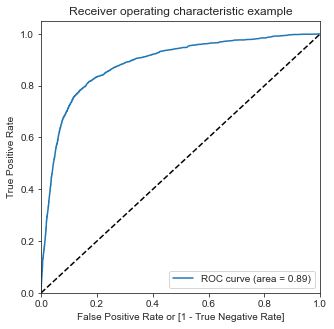

In [198]:
draw_roc(y_train_pred_df.is_churn,y_train_pred_df.churn_proba)

In [199]:
# finding the optimal cutoff point

num = [float(x)/10 for x in range(10)]

for i in num:
    y_train_pred_df[i] = y_train_pred_df.churn_proba.map(lambda x: 1 if x>i else 0)
y_train_pred_df.head()

ID  is_churn  churn_proba  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0  76985         0       0.0140          0    1    0    0    0    0    0    0   
1  77814         0       0.0775          0    1    0    0    0    0    0    0   
2  24787         0       0.0116          0    1    0    0    0    0    0    0   
3  60192         0       0.0068          0    1    0    0    0    0    0    0   
4  69896         0       0.0048          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [200]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.is_churn, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.111772  0.998898  0.027876
0.1   0.1  0.813443  0.826446  0.812213
0.2   0.2  0.902794  0.661157  0.925646
0.3   0.3  0.917646  0.465565  0.960400
0.4   0.4  0.919408  0.317906  0.976292
0.5   0.5  0.918456  0.208815  0.985567
0.6   0.6  0.918979  0.147107  0.991976
0.7   0.7  0.917932  0.095317  0.995727
0.8   0.8  0.916932  0.055647  0.998385
0.9   0.9  0.915314  0.024242  0.999583


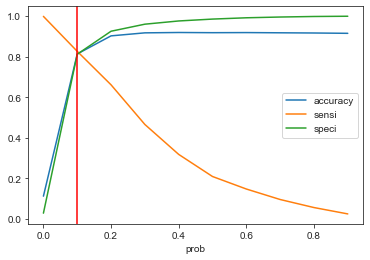

In [201]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x = 0.1, color = 'r', linestyle = '-')
plt.show()

In [202]:
# Prediction based on the 0.1 cutoff
y_train_pred_df['Predicted'] = y_train_pred_df.churn_proba.map(lambda x: 1 if x > 0.1 else 0 )
y_train_pred_df.head()

ID  is_churn  churn_proba  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0  76985         0       0.0140          0    1    0    0    0    0    0    0   
1  77814         0       0.0775          0    1    0    0    0    0    0    0   
2  24787         0       0.0116          0    1    0    0    0    0    0    0   
3  60192         0       0.0068          0    1    0    0    0    0    0    0   
4  69896         0       0.0048          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [203]:
evaluation_matrix(y_train_pred_df.is_churn, y_train_pred_df.Predicted )

The Confusion matrx is:
 [[15588  3604]
 [  315  1500]]
The Accuracy Score is : 0.81
Recall: 0.8264
Specificity: 0.8122
Precision: 0.2939
AUC score : 0.8193


In [204]:
# making the prediction
X_test1 = X_test[c_rfe]
X_test1.head()

arpu_7  onnet_mou_6  onnet_mou_8  offnet_mou_6  offnet_mou_8  \
50179 -0.446908     0.562231    -0.244493     -0.259092     -0.605938   
20587  0.037602     0.108946    -0.215548     -0.045892      0.061277   
51116  1.215722    -0.185304     0.285171      0.747033      0.260307   
70628 -0.507765    -0.500246    -0.335674     -0.298745     -0.046795   
75091 -0.829690    -0.391548    -0.342018     -0.685172     -0.698058   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_mou_8  total_og_mou_7  \
50179         -0.341750         -0.583263     -0.628887        0.586978   
20587          0.308446          0.750081      0.790179        0.114275   
51116          1.330025          1.660081      1.649200        0.722149   
70628          0.101639          0.093647      0.355889       -0.362180   
75091          0.101426         -0.461169     -0.279559       -0.739154   

       loc_ic_mou_8  std_ic_mou_8  total_ic_mou_6  spl_ic_mou_8  isd_ic_mou_8  \
50179     -0.741854      0.098792       -0.220771     -0.237277     -0.093035   
20587      0.461223     -0.120255        0.596638     -0.237277     -0.156162   
51116      7.364933     -0.339799        8.981714     -0.237277     -0.156162   
70628      0.100014     -0.021204       -0.372008     -0.237277     -0.116657   
75091     -0.244744     -0.269008       -0.245968     -0.237277     -0.156162   

       last_day_rch_amt_8  monthly_2g_8  sachet_2g_8  monthly_3g_8       aon  \
50179           -0.314291     -0.319253    -0.329433     -0.297129 -0.477894   
20587            0.236453     -0.319253    -0.329433     -0.297129 -0.174381   
51116           -0.314291      2.479780    -0.329433     -0.297129  0.746411   
70628            0.236453     -0.319253    -0.329433     -0.297129  0.945335   
75091            0.718355     -0.319253    -0.329433     -0.297129  1.347285   

       sep_vbc_3g  days_last_rech  
50179   -0.134930        0.145706  
20587   -0.134930       -0.504445  
51116   -0.134930       -0.504445  
70628    0.351934       -0.504445  
75091    1.534963        2.486248

In [205]:
# adding constant
X_test_sm = sm.add_constant(X_test1)
y_test_pred = res.predict(X_test_sm).values.reshape(-1)

In [206]:
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df = pd.DataFrame({"ID":y_test.index, "is_churn": y_test.values, "churn_proba": y_test_pred})
y_pred_df.head()

ID  is_churn  churn_proba
0  50179         0     0.195146
1  20587         0     0.019803
2  51116         0     0.000032
3  70628         0     0.007836
4  75091         0     0.011808

In [207]:
y_pred_df['final_prediction_val'] = y_pred_df.churn_proba.map(lambda x: 1 if x>0.1 else 0)
y_pred_df.head()

ID  is_churn  churn_proba  final_prediction_val
0  50179         0     0.195146                     1
1  20587         0     0.019803                     0
2  51116         0     0.000032                     0
3  70628         0     0.007836                     0
4  75091         0     0.011808                     0

In [208]:
evaluation_matrix(y_pred_df.is_churn , y_pred_df.final_prediction_val)

The Confusion matrx is:
 [[6616 1610]
 [ 150  628]]
The Accuracy Score is : 0.8
Recall: 0.8072
Specificity: 0.8043
Precision: 0.2806
AUC score : 0.8057


In [209]:
print('The important parameters for the prediction of the churn customers are:', X_train[c_rfe].columns)

The important parameters for the prediction of the churn customers are: Index(['arpu_7', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_mou_8',
       'total_og_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aon', 'sep_vbc_3g', 'days_last_rech'],
      dtype='object')


In [210]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['LogisticRegression'],
                            'train_accuracy': [accuracy_score(y_train_pred_df.is_churn, y_train_pred_df.Predicted).round(4)],
                            'train_recall': [recall_score(y_train_pred_df.is_churn, y_train_pred_df.Predicted).round(4)],
                            'train_precision': [precision_score(y_train_pred_df.is_churn, y_train_pred_df.Predicted).round(4)],
                            'test_accuracy' : [accuracy_score(y_pred_df.is_churn , y_pred_df.final_prediction_val).round(4)],
                            'test_recall': [recall_score(y_pred_df.is_churn , y_pred_df.final_prediction_val).round(4)],
                            'test_precision': [precision_score(y_pred_df.is_churn , y_pred_df.final_prediction_val).round(4)]
                          })
temp
Final_score_8 = pd.concat([Final_score_7, temp])
Final_score_8

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   
0                       PCA + Logistic Regression          0.8408   
0        DecisionTreeClassifier_without_hyperpara          0.9209   
0           DecisionTreeClassifier_with_hyperpara          0.8647   
0        RandomForestClassifier_without_hyperpara          0.9551   
0           RandomForestClassifier_with_hyperpara          0.8877   
0                              LogisticRegression          0.8134   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339  
0        0.8259           0.3311         0.5866       0.9254          0.1642  
0        0.9802           0.5225         0.8826       0.7468          0.4032  
0        0.8672           0.3770         0.8564       0.8239          0.3567  
0        0.9069           0.6802         0.9271       0.6825          0.5649  
0        0.8430           0.4245         0.8853       0.7956          0.4146  
0        0.8264           0.2939         0.8045       0.8072          0.2806

- By implementation of the logistic regression on the given dataset, the accuracy score for the train and test dataset is observed as 0.81 and 0.80 respectively.
- In case of the Recall matrix, we are getting it as 0.82 for train and 0.80 for test set.
- The RFE method is used for the feature selection, top 20 features for the prediction whether the customer is churn or ont is: 'arpu_7', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_mou_8', 'total_og_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'sep_vbc_3g', 'days_last_rech'.

# 5.8 XGBClassifier

### A. Without Hyperparameters

In [211]:
# Instanteating exboost algorithm
xgclf = XGBClassifier(n_jobs=-1,random_state=100,scale_pos_weight=(len(y_train)-y_train.sum())/y_train.sum(),
                      verbosity=0,silent=True)

# fitting the algorithms
xgclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=100, ...)

In [212]:
# parameters
xgclf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 100,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 10.574104683195593,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0,
 'silent': True}

In [213]:
# Deriving predicted y-values for the final XGBoost model
y_train_pred_xgb = xgclf.predict(X_train)
y_test_pred_xgb = xgclf.predict(X_test)

In [214]:
# evaluating Training dataset
evaluation_matrix(y_train, y_train_pred_xgb)

The Confusion matrx is:
 [[19057   135]
 [    0  1815]]
The Accuracy Score is : 0.99
Recall: 1.0
Specificity: 0.993
Precision: 0.9308
AUC score : 0.9965


In [215]:
# evaluating test dataset
evaluation_matrix(y_test, y_test_pred_xgb)

The Confusion matrx is:
 [[7892  334]
 [ 266  512]]
The Accuracy Score is : 0.93
Recall: 0.6581
Specificity: 0.9594
Precision: 0.6052
AUC score : 0.8087


In [216]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['XGBClassifier_without_hyperpara'],
                            'train_accuracy': [accuracy_score(y_train, y_train_pred_xgb).round(4)],
                            'train_recall': [recall_score(y_train, y_train_pred_xgb).round(4)],
                            'train_precision': [precision_score(y_train, y_train_pred_xgb).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, y_test_pred_xgb).round(4)],
                            'test_recall': [recall_score(y_test, y_test_pred_xgb).round(4)],
                            'test_precision': [precision_score(y_test, y_test_pred_xgb).round(4)]
                          })
temp
Final_score_9 = pd.concat([Final_score_8, temp])
Final_score_9

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   
0                       PCA + Logistic Regression          0.8408   
0        DecisionTreeClassifier_without_hyperpara          0.9209   
0           DecisionTreeClassifier_with_hyperpara          0.8647   
0        RandomForestClassifier_without_hyperpara          0.9551   
0           RandomForestClassifier_with_hyperpara          0.8877   
0                              LogisticRegression          0.8134   
0                 XGBClassifier_without_hyperpara          0.9936   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339  
0        0.8259           0.3311         0.5866       0.9254          0.1642  
0        0.9802           0.5225         0.8826       0.7468          0.4032  
0        0.8672           0.3770         0.8564       0.8239          0.3567  
0        0.9069           0.6802         0.9271       0.6825          0.5649  
0        0.8430           0.4245         0.8853       0.7956          0.4146  
0        0.8264           0.2939         0.8045       0.8072          0.2806  
0        1.0000           0.9308         0.9334       0.6581          0.6052

- The XGBClassifier classifier is run with the defalut parameters and it will completely overfitting on the training dataset with the recall value of 1 and for the test dataset the recall value is observed as 0.65.

### B. With Hyperparameters

In [217]:
# hyperparameters
parameters = {'learning_rate': [0.1, 0.25 ,0.5],
              'max_depth': [2, 5, 10, 15],
              'min_child_weight': [1, 10, 25, 50],
              'n_estimators': [5, 10, 15, 20]}

In [218]:
rscv_xgb = RandomizedSearchCV(xgclf,params,n_iter=10,scoring='recall',n_jobs=-1,refit='recall',cv=4,random_state=100)

In [219]:
%%time
# Took 11 mins to fit
rscv_xgb.fit(X_train,y_train)

CPU times: total: 14.2 s
Wall time: 5min 14s


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300...
                                           max_delta_step=0, max_depth=6,
                                           max_leaves=0, min_chi

In [220]:
# Viewing the results of RandomizedSearchCV
xgb_res = pd.DataFrame(rscv_xgb.cv_results_)
xgb_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      22.827274      1.688971         0.079640        0.012765   
1      42.062132      2.937250         0.117258        0.020415   
2      26.083490      1.165422         0.082290        0.006626   
3      10.191966      0.345009         0.061955        0.010297   
4      43.214271      2.345331         0.100193        0.003489   

  param_n_estimators param_min_samples_leaf param_max_depth  \
0                 50                    100              10   
1                100                    200              20   
2                 50                     50              40   
3                 50                     50               5   
4                100                    100              20   

                                              params  split0_test_score  \
0  {'n_estimators': 50, 'min_samples_leaf': 100, ...           0.649780   
1  {'n_estimators': 100, 'min_samples_leaf': 200,...           0.634361   
2  {'n_estimators': 50, 'min_samples_leaf': 50, '...           0.629956   
3  {'n_estimators': 50, 'min_samples_leaf': 50, '...           0.773128   
4  {'n_estimators': 100, 'min_samples_leaf': 100,...           0.634361   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.660793           0.643172           0.591611         0.636339   
1           0.638767           0.605727           0.600442         0.619824   
2           0.621145           0.610132           0.604857         0.616522   
3           0.775330           0.773128           0.772627         0.773553   
4           0.638767           0.605727           0.600442         0.619824   

   std_test_score  rank_test_score  
0        0.026580                4  
1        0.016916                7  
2        0.009731               10  
3        0.001046                1  
4        0.016916                7

In [221]:
# best parameters
rscv_xgb.best_params_

{'n_estimators': 50, 'min_samples_leaf': 50, 'max_depth': 5}

In [222]:
# best estimator
xgb_best = rscv_xgb.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              min_samples_leaf=50, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1, predictor='auto', ...)

In [223]:
# PREDICTION
y_train_pred_xgb = xgb_best.predict(X_train)
y_test_pred_xgb = xgb_best.predict(X_test)

In [224]:
#Train dataset
evaluation_matrix(y_train, y_train_pred_xgb)

The Confusion matrx is:
 [[18243   949]
 [    7  1808]]
The Accuracy Score is : 0.95
Recall: 0.9961
Specificity: 0.9506
Precision: 0.6558
AUC score : 0.9733


In [225]:
# test dataset
evaluation_matrix(y_test, y_test_pred_xgb)

The Confusion matrx is:
 [[7680  546]
 [ 166  612]]
The Accuracy Score is : 0.92
Recall: 0.7866
Specificity: 0.9336
Precision: 0.5285
AUC score : 0.8601


In [226]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['XGBClassifier_with_hyperpara'],
                            'train_accuracy': [accuracy_score(y_train, y_train_pred_xgb).round(4)],
                            'train_recall': [recall_score(y_train, y_train_pred_xgb).round(4)],
                            'train_precision': [precision_score(y_train, y_train_pred_xgb).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, y_test_pred_xgb).round(4)],
                            'test_recall': [recall_score(y_test, y_test_pred_xgb).round(4)],
                            'test_precision': [precision_score(y_test, y_test_pred_xgb).round(4)]
                          })
temp
Final_score_10 = pd.concat([Final_score_9, temp])
Final_score_10

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   
0                       PCA + Logistic Regression          0.8408   
0        DecisionTreeClassifier_without_hyperpara          0.9209   
0           DecisionTreeClassifier_with_hyperpara          0.8647   
0        RandomForestClassifier_without_hyperpara          0.9551   
0           RandomForestClassifier_with_hyperpara          0.8877   
0                              LogisticRegression          0.8134   
0                 XGBClassifier_without_hyperpara          0.9936   
0                    XGBClassifier_with_hyperpara          0.9545   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339  
0        0.8259           0.3311         0.5866       0.9254          0.1642  
0        0.9802           0.5225         0.8826       0.7468          0.4032  
0        0.8672           0.3770         0.8564       0.8239          0.3567  
0        0.9069           0.6802         0.9271       0.6825          0.5649  
0        0.8430           0.4245         0.8853       0.7956          0.4146  
0        0.8264           0.2939         0.8045       0.8072          0.2806  
0        1.0000           0.9308         0.9334       0.6581          0.6052  
0        0.9961           0.6558         0.9209       0.7866          0.5285

# 5.9 Support Vector Machine

In [227]:
# importing library
from sklearn.svm import SVC

In [228]:
# instanteating the model
model_svc = SVC(C = 1)

# fitting
model_svc.fit(X_train, y_train)

SVC(C=1)

In [229]:
# PREDICTION
y_train_pred_svc = model_svc.predict(X_train)
y_test_pred_svc = model_svc.predict(X_test)

In [230]:
#Train dataset
evaluation_matrix(y_train, y_train_pred_svc)

The Confusion matrx is:
 [[19118    74]
 [ 1209   606]]
The Accuracy Score is : 0.94
Recall: 0.3339
Specificity: 0.9961
Precision: 0.8912
AUC score : 0.665


In [231]:
# test dataset
evaluation_matrix(y_test, y_test_pred_svc)

The Confusion matrx is:
 [[8188   38]
 [ 593  185]]
The Accuracy Score is : 0.93
Recall: 0.2378
Specificity: 0.9954
Precision: 0.8296
AUC score : 0.6166


### Hyperparameter tuning

In [232]:
# C value 
param = {'C' : [0.1,0.5,1,10,100]}

# model
model_svc = SVC()

In [233]:
# hyperparameter tuning
model_SVC= GridSearchCV(estimator=model_svc, param_grid= param,scoring= 'recall', cv = 3, verbose=1, return_train_score=True)

In [234]:
# fitting
model_SVC.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=SVC(), param_grid={'C': [0.1, 0.5, 1, 10, 100]},
             return_train_score=True, scoring='recall', verbose=1)

In [235]:
# results of grid search CV
cv_results = pd.DataFrame(model_SVC.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       6.381142      0.376399         4.047957        0.066585     0.1   
1       6.480754      0.089904         3.892732        0.055736     0.5   
2       6.934752      0.059396         4.077066        0.049128       1   
3       8.204753      0.067446         4.027523        0.052081      10   
4      10.209478      0.282240         3.780790        0.029460     100   

       params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.1}           0.000000           0.001653           0.011570   
1  {'C': 0.5}           0.150413           0.142149           0.170248   
2    {'C': 1}           0.256198           0.247934           0.238017   
3   {'C': 10}           0.350413           0.319008           0.343802   
4  {'C': 100}           0.444628           0.436364           0.490909   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.004408        0.005109                5            0.000000   
1         0.154270        0.011791                4            0.180992   
2         0.247383        0.007433                3            0.333884   
3         0.337741        0.013518                2            0.607438   
4         0.457300        0.024003                1            0.872727   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.004132            0.015702          0.006612         0.006646  
1            0.161157            0.189256          0.177135         0.011791  
2            0.313223            0.340496          0.329201         0.011616  
3            0.578512            0.577686          0.587879         0.013835  
4            0.871074            0.864463          0.869421         0.003571

In [236]:
# best c score
C_best = model_SVC.best_params_['C']
C_best

100

##### model building with best value of C

In [237]:
# Taking best c score
model_svc = SVC(C=C_best)

model_svc.fit(X_train, y_train)

SVC(C=100)

In [238]:
# PREDICTION
y_train_pred_svc = model_svc.predict(X_train)
y_test_pred_svc = model_svc.predict(X_test)

In [239]:
#Train dataset
evaluation_matrix(y_train, y_train_pred_svc)

The Confusion matrx is:
 [[19114    78]
 [  271  1544]]
The Accuracy Score is : 0.98
Recall: 0.8507
Specificity: 0.9959
Precision: 0.9519
AUC score : 0.9233


In [240]:
# test dataset
evaluation_matrix(y_test, y_test_pred_svc)

The Confusion matrx is:
 [[7931  295]
 [ 423  355]]
The Accuracy Score is : 0.92
Recall: 0.4563
Specificity: 0.9641
Precision: 0.5462
AUC score : 0.7102


In [241]:
# Creating a DataFrame with training and test performance metrics
temp = pd.DataFrame({'Method':['Support_vector_classifier'],
                            'train_accuracy': [accuracy_score(y_train, y_train_pred_svc).round(4)],
                            'train_recall': [recall_score(y_train, y_train_pred_svc).round(4)],
                            'train_precision': [precision_score(y_train, y_train_pred_svc).round(4)],
                            'test_accuracy' : [accuracy_score(y_test, y_test_pred_svc).round(4)],
                            'test_recall': [recall_score(y_test, y_test_pred_svc).round(4)],
                            'test_precision': [precision_score(y_test, y_test_pred_svc).round(4)]
                          })
temp
Final_score_10 = pd.concat([Final_score_10, temp])
Final_score_10

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   
0                       PCA + Logistic Regression          0.8408   
0        DecisionTreeClassifier_without_hyperpara          0.9209   
0           DecisionTreeClassifier_with_hyperpara          0.8647   
0        RandomForestClassifier_without_hyperpara          0.9551   
0           RandomForestClassifier_with_hyperpara          0.8877   
0                              LogisticRegression          0.8134   
0                 XGBClassifier_without_hyperpara          0.9936   
0                    XGBClassifier_with_hyperpara          0.9545   
0                       Support_vector_classifier          0.9834   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339  
0        0.8259           0.3311         0.5866       0.9254          0.1642  
0        0.9802           0.5225         0.8826       0.7468          0.4032  
0        0.8672           0.3770         0.8564       0.8239          0.3567  
0        0.9069           0.6802         0.9271       0.6825          0.5649  
0        0.8430           0.4245         0.8853       0.7956          0.4146  
0        0.8264           0.2939         0.8045       0.8072          0.2806  
0        1.0000           0.9308         0.9334       0.6581          0.6052  
0        0.9961           0.6558         0.9209       0.7866          0.5285  
0        0.8507           0.9519         0.9203       0.4563          0.5462

# 6. Conclusion & Recommendations

**General**
- The initial dataset consists of 226 independent variables, which has been reduced to 130 after performing the Feature engineering and EDA.
- The dependent variable that predicts whether the customer will churn or not is derived based on 70th percentile of the average recharge amount in the 6th and 7th-month i,e in the good phase.




**Recommendations**
- Based on the analysis a pattern is observed as the customer has stopped or minimises the usage of the services during the action phase as compared to the good phase, then this customer is most likely to churn.
- The customers who are using the STD_OG services during the good phase are most likely to be churning, which may be because of the competitive recharge price or network issues.
- Average revenue per user should also be monitored for a reduction in consumption which would indicate potential customer churn
- If the customer reduces the recharge amount during the action phase as compared to the good phase, the system should trigger that particular customer is likely being churned. 
- The Age on a network (AON), indicates that newly joined customers have high chances of churn. This might be because of adaptation issues or unsatisfactory services.
- Customer who have not recharged in recent days even after the recharge is due, are more likely to churn in the churning phase. 


**Model Performance**
- We aim to reduce the `False Negative` errors while reduction hence we need to maximise the `recall` score during the deployment phase. 
- The unsupervised Principal component analysis is implemented to reduce the dimensions in a dataset to increase the computation power. The Boosting and Logistic regression models are implemented on top of PCA and the original datasets. 
- For the PCA dataset, in terms of accuracy the Random Forest Classifier algorithm is best. it gives an accuracy of 92.92% for train and 89.76% for test dataset. For this the recall is higher in the case of train dataset which is 89.54% as compared to test dataset 65.68%.
- The combination of PCA and logistic regression can false negative values very well, for the train and test dataset it gives 82.59% and 92.54% recall score, With an accuracy of 84.08% and 58.99% respectively.
- In original datasets, XGBClassifier works very well in terms of accuracy and recall score. In the case of the train dataset accuracy and recall value is observed as 95.45% and 99.61%, while for the test dataset it is 92.09% and 78.66% respectively.
- Similarly, logistic regression gives almost constant performance over accuracy and recall matrix. The accuracy for the train and test datasets is 81.34% and 80.45% respectively whereas the recall score for the train is 82.64% and 80.72% for the test dataset.


##### Final evaluation matrix for all model

In [242]:
Final_score_10

Method  train_accuracy  \
0  PCA + DecisionTreeClassifier_without_hyperpara          0.9000   
0     PCA + DecisionTreeClassifier_with_hyperpara          0.8212   
0  PCA + RandomForestClassifier_without_hyperpara          0.8411   
0     PCA + RandomForestClassifier_with_hyperpara          0.8540   
0                       PCA + Logistic Regression          0.8408   
0        DecisionTreeClassifier_without_hyperpara          0.9209   
0           DecisionTreeClassifier_with_hyperpara          0.8647   
0        RandomForestClassifier_without_hyperpara          0.9551   
0           RandomForestClassifier_with_hyperpara          0.8877   
0                              LogisticRegression          0.8134   
0                 XGBClassifier_without_hyperpara          0.9936   
0                    XGBClassifier_with_hyperpara          0.9545   
0                       Support_vector_classifier          0.9834   

   train_recall  train_precision  test_accuracy  test_recall  test_precision  
0        0.9377           0.4614         0.8486       0.6427          0.3155  
0        0.8253           0.3034         0.8079       0.7481          0.2750  
0        0.7939           0.3271         0.8049       0.5488          0.2330  
0        0.8121           0.3510         0.8477       0.7661          0.3339  
0        0.8259           0.3311         0.5866       0.9254          0.1642  
0        0.9802           0.5225         0.8826       0.7468          0.4032  
0        0.8672           0.3770         0.8564       0.8239          0.3567  
0        0.9069           0.6802         0.9271       0.6825          0.5649  
0        0.8430           0.4245         0.8853       0.7956          0.4146  
0        0.8264           0.2939         0.8045       0.8072          0.2806  
0        1.0000           0.9308         0.9334       0.6581          0.6052  
0        0.9961           0.6558         0.9209       0.7866          0.5285  
0        0.8507           0.9519         0.9203       0.4563          0.5462